In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(24,16)})

C:\Users\bohnd\.conda\envs\EDA\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('salary_numeric.csv')
colors=sns.color_palette("vlag", as_cmap=True)

In [3]:
df.head()

,age,gender,education,industry,industry_experience,salary
0,19,Male,12,business,0,33640.60752
1,21,Male,12,business,2,43554.24216
2,19,Male,12,business,0,39795.29424
3,22,Male,12,business,1,51102.98856
4,21,Male,12,business,1,32809.57056


<AxesSubplot:xlabel='industry_experience', ylabel='salary'>

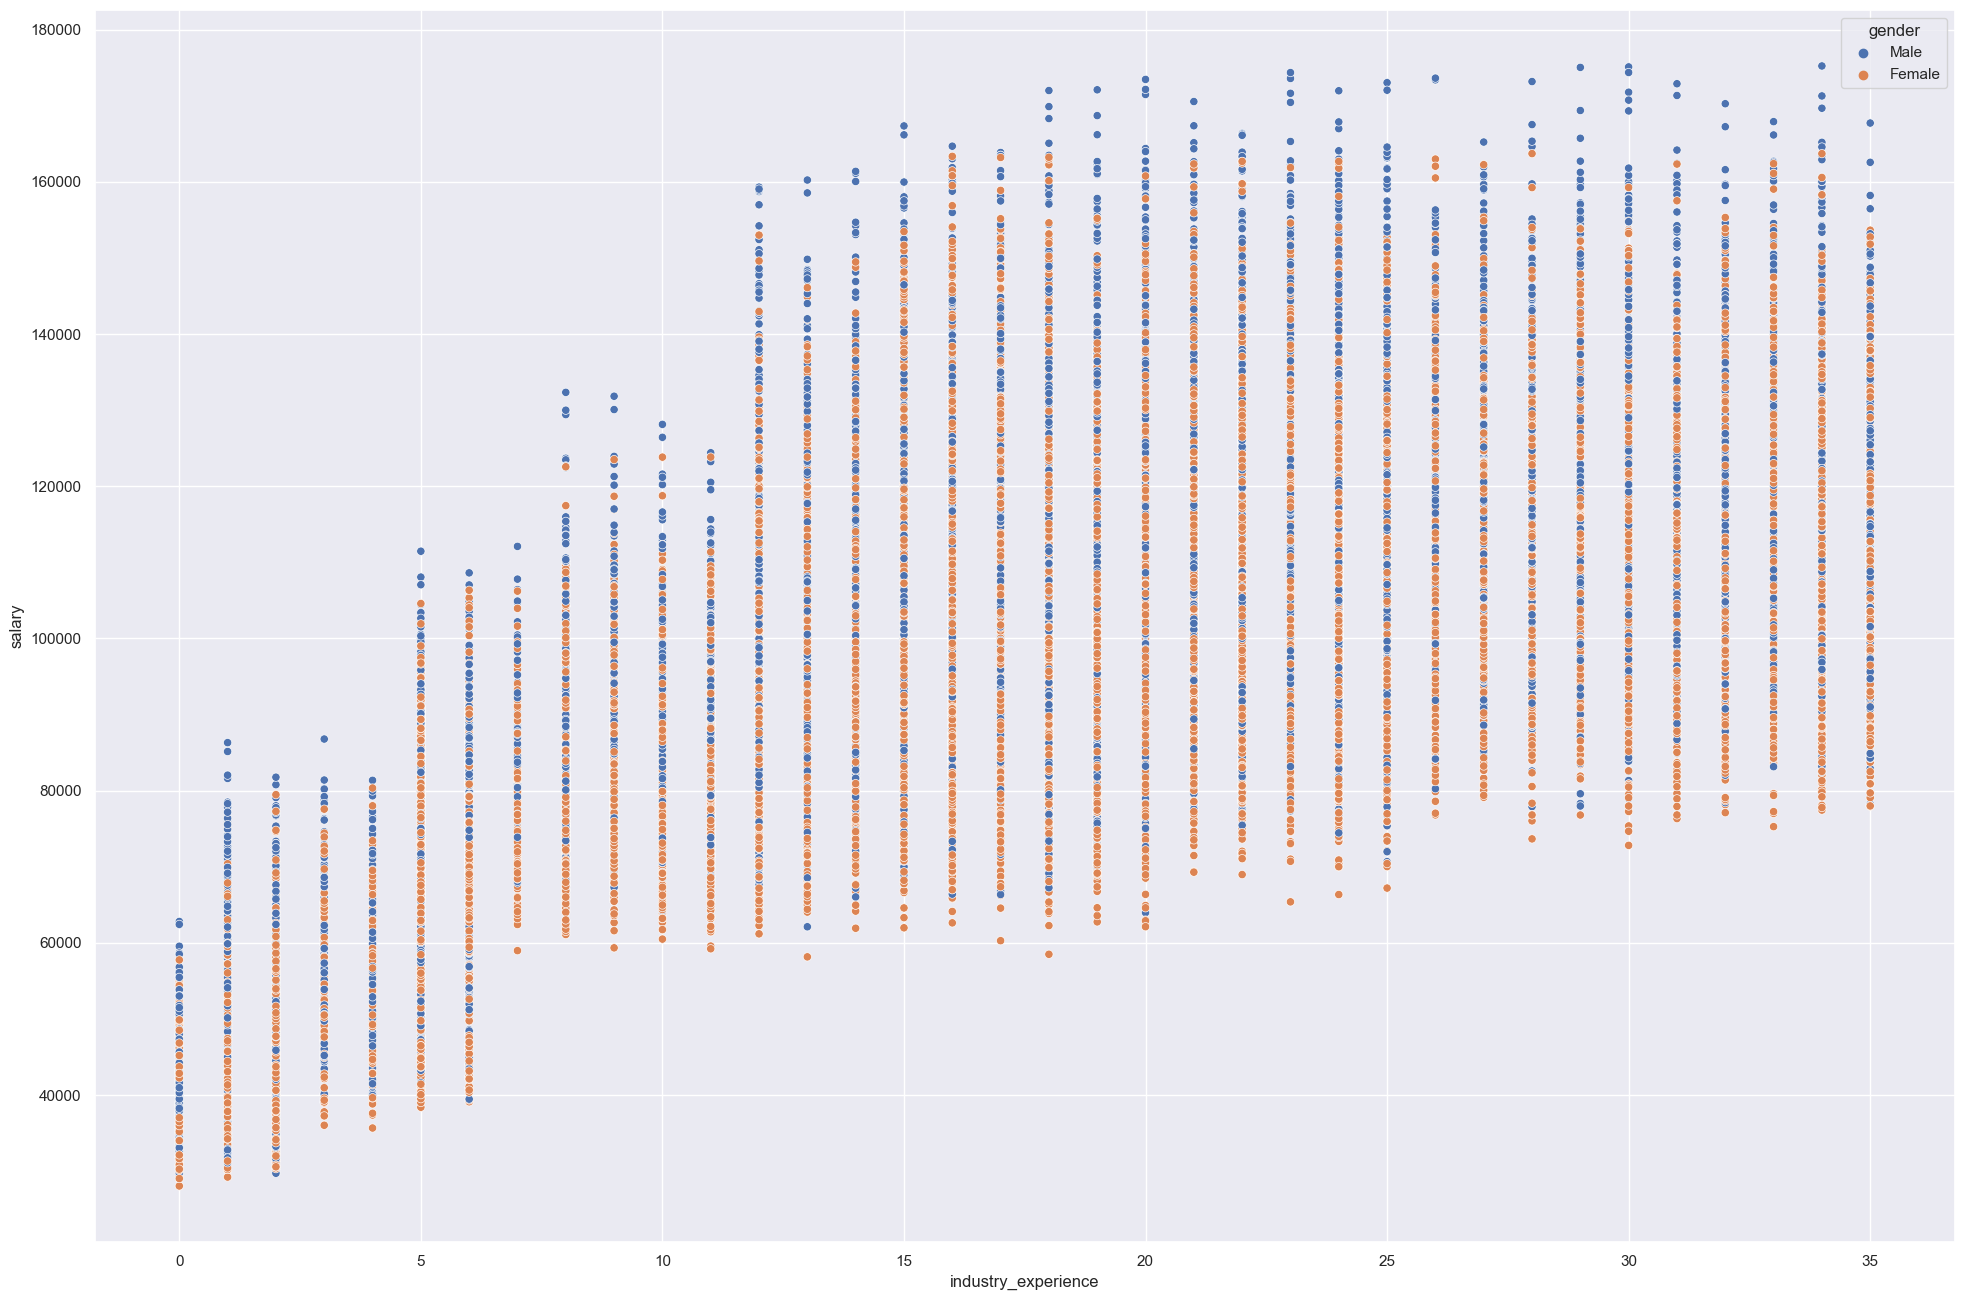

In [4]:
sns.scatterplot(data=df, x='industry_experience', y='salary', hue='gender')

<AxesSubplot:xlabel='industry_experience', ylabel='salary'>

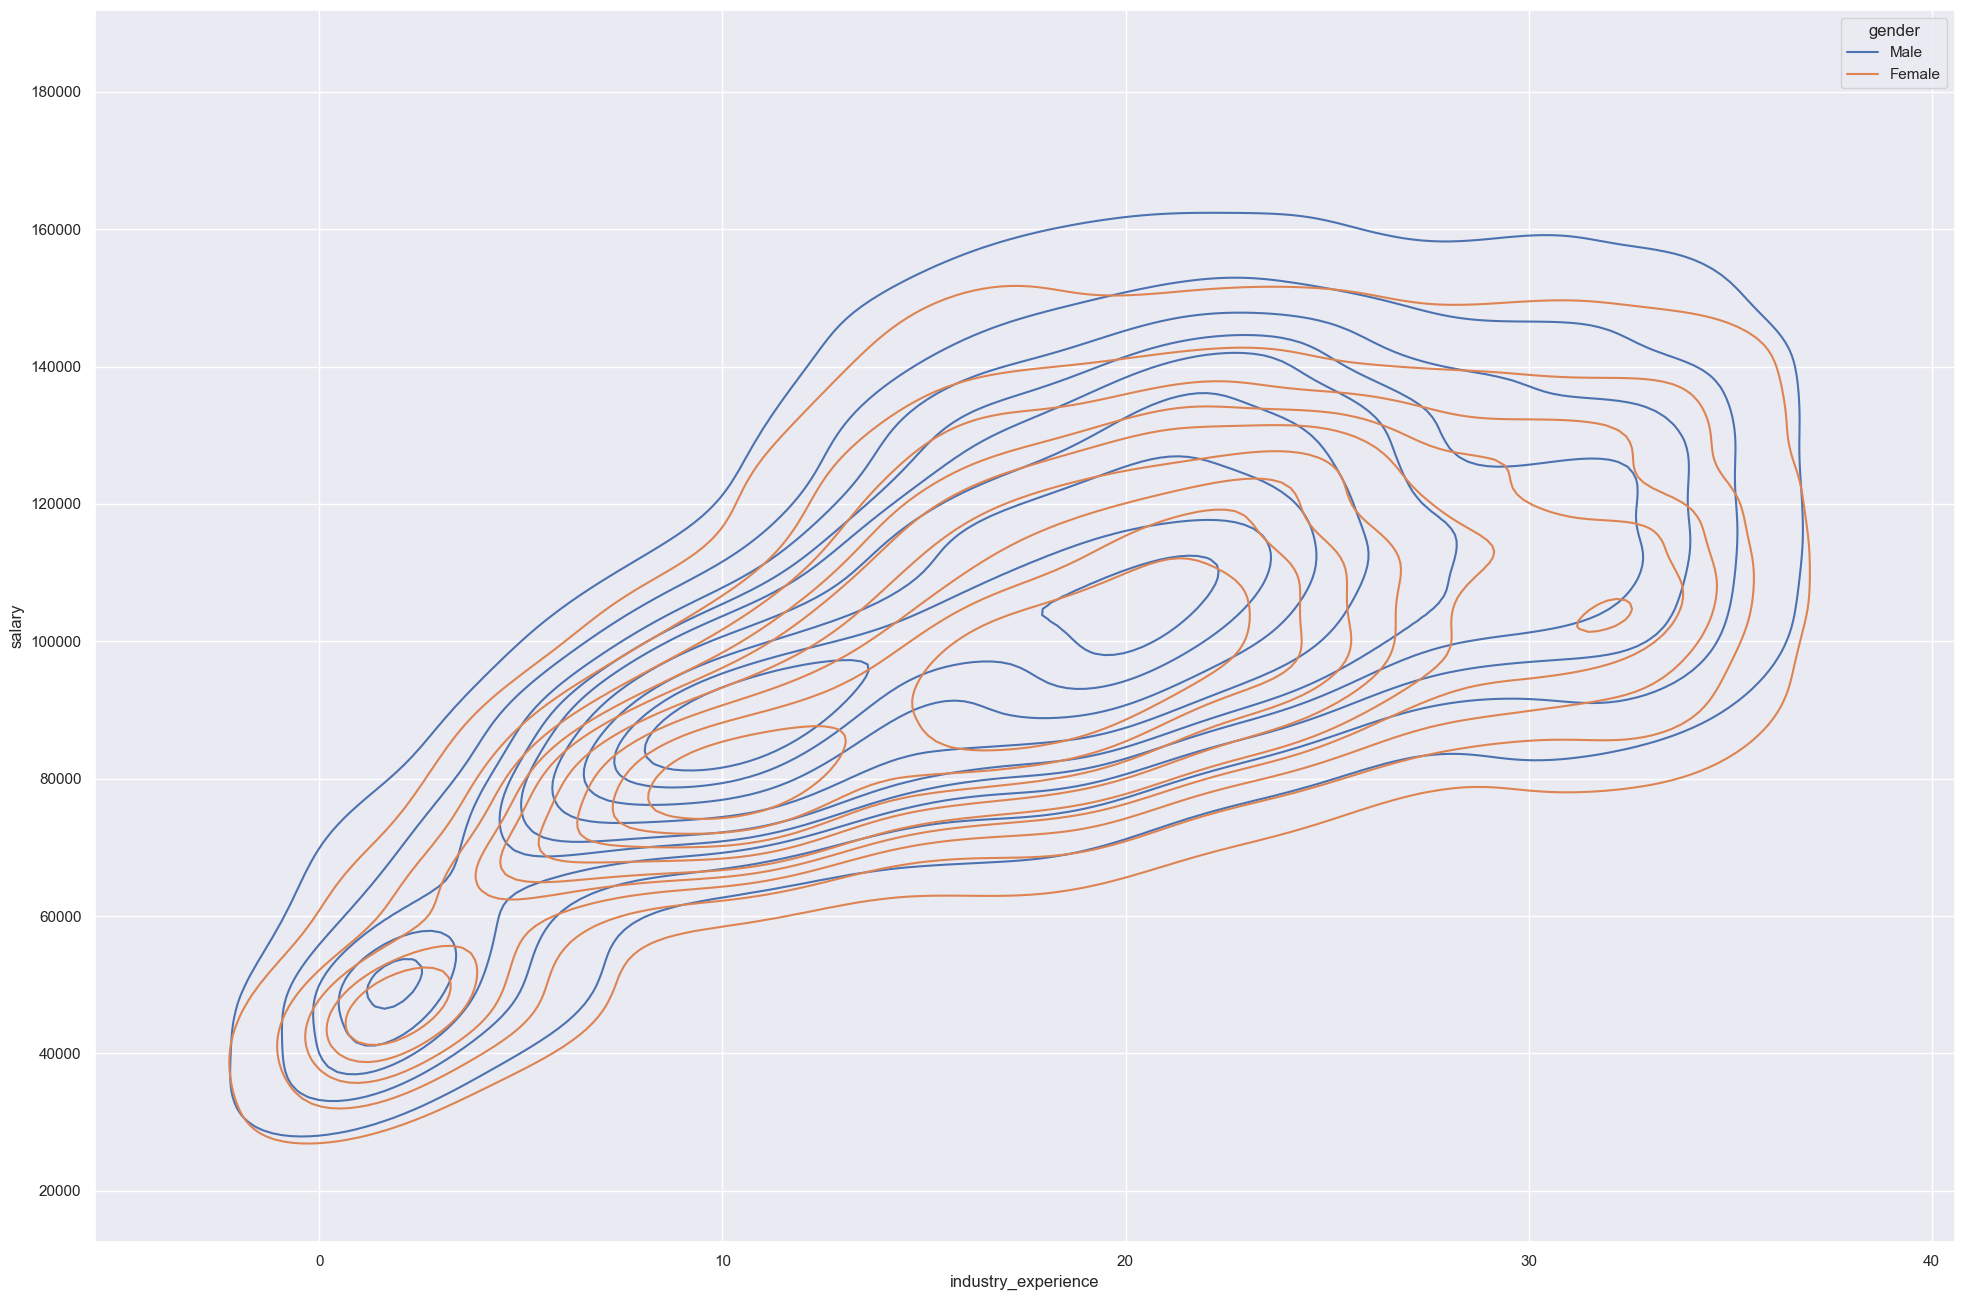

In [5]:
sns.kdeplot(data=df, x='industry_experience', y='salary', hue='gender')

<AxesSubplot:xlabel='salary', ylabel='Density'>

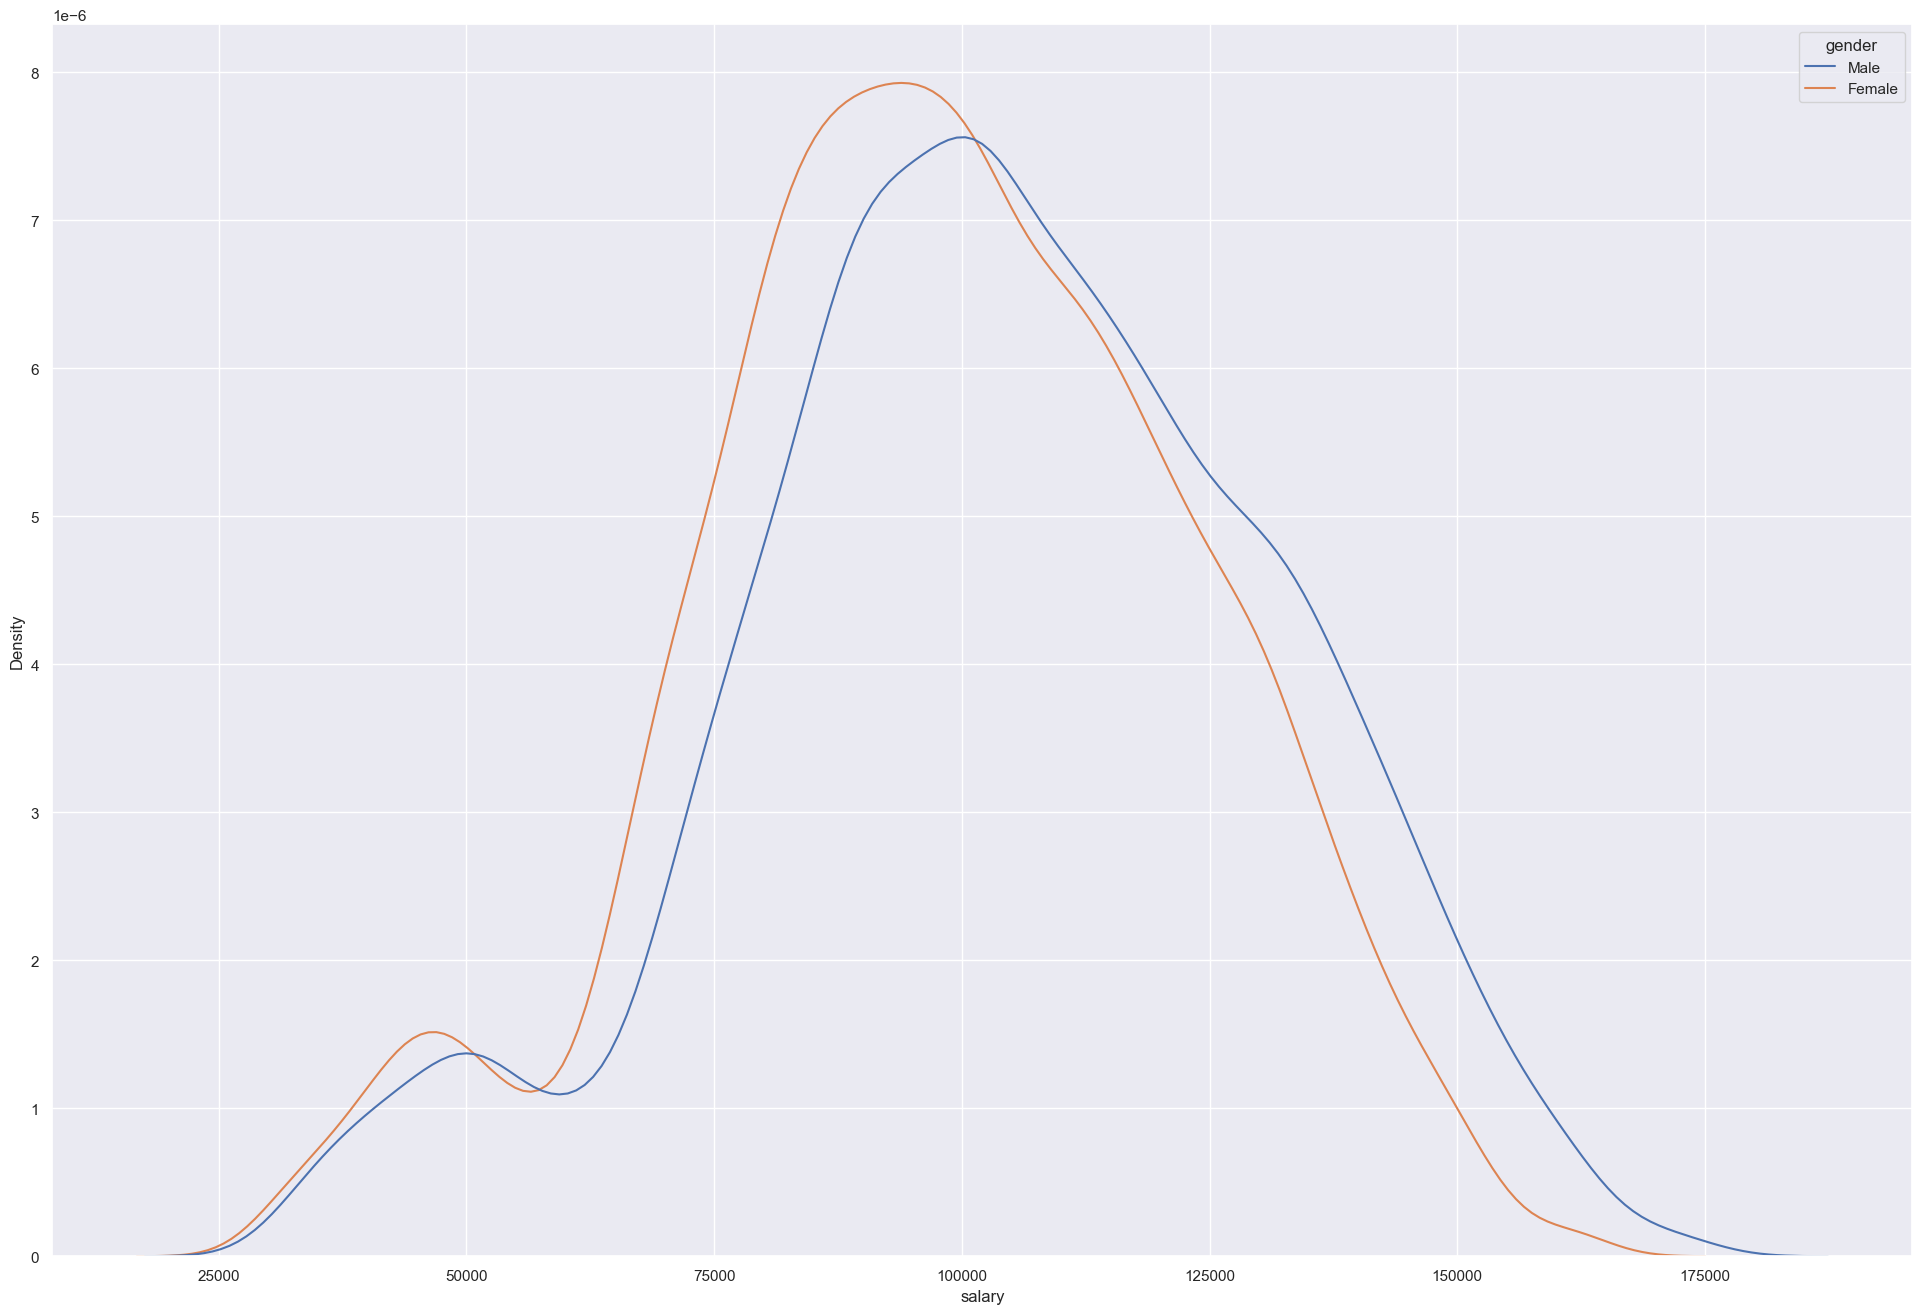

In [6]:
sns.kdeplot(data=df, x='salary', hue='gender')

<AxesSubplot:xlabel='industry_experience', ylabel='Density'>

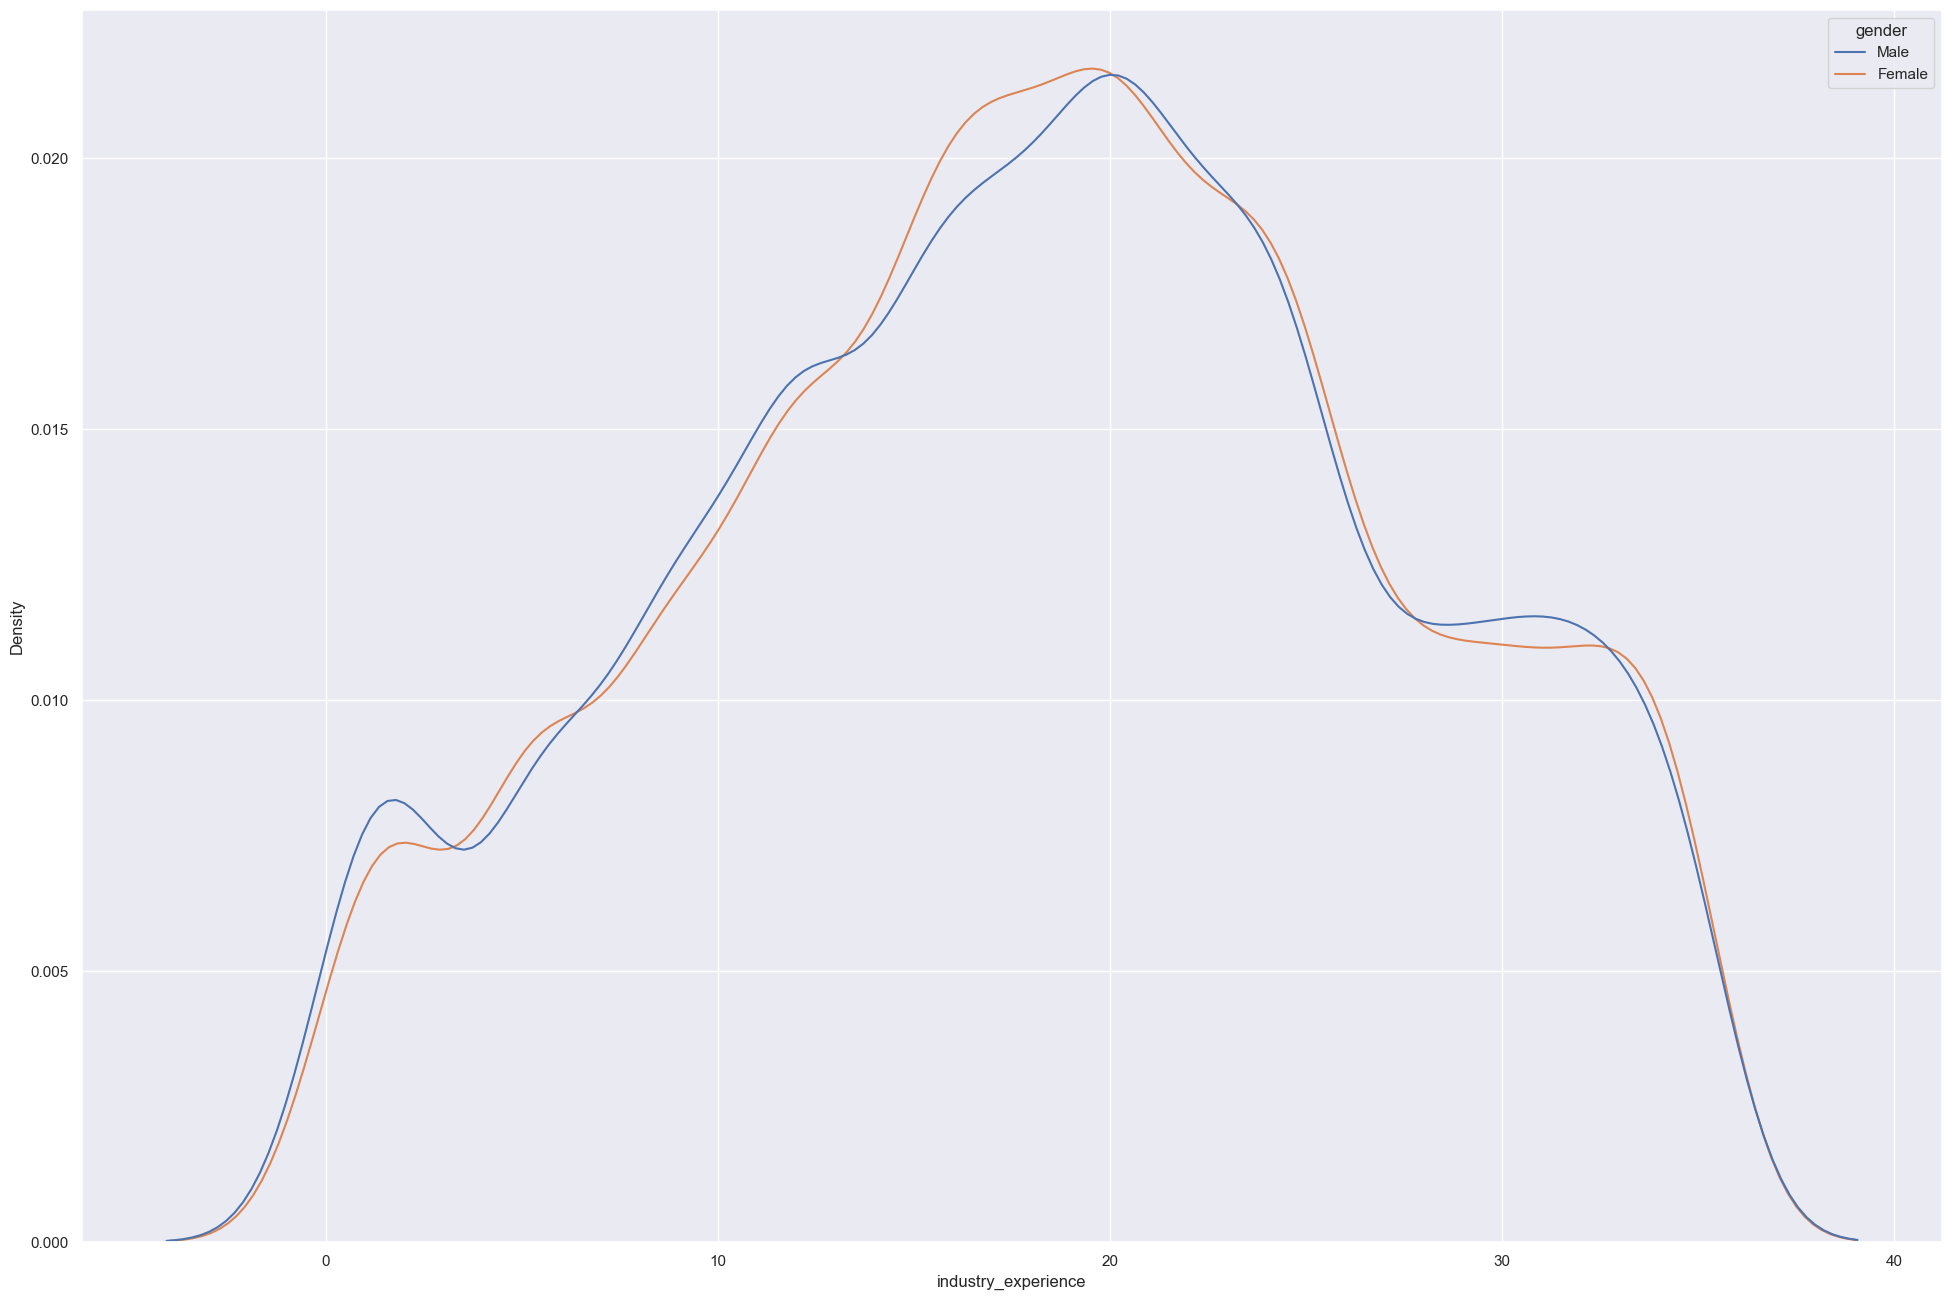

In [7]:
sns.kdeplot(data=df, x='industry_experience', hue='gender')

In [8]:
df_m = df.drop(df[df.gender == 'Female'].index)
df_f = df.drop(df[df.gender == 'Male'].index)

In [9]:
df_m = df_m.drop('gender', axis=1)
df_f = df_f.drop('gender', axis=1)
df_m = df_m.drop('industry', axis=1)
df_f = df_f.drop('industry', axis=1)

In [10]:
df_m.head()

,age,education,industry_experience,salary
0,19,12,0,33640.60752
1,21,12,2,43554.24216
2,19,12,0,39795.29424
3,22,12,1,51102.98856
4,21,12,1,32809.57056


<AxesSubplot:>

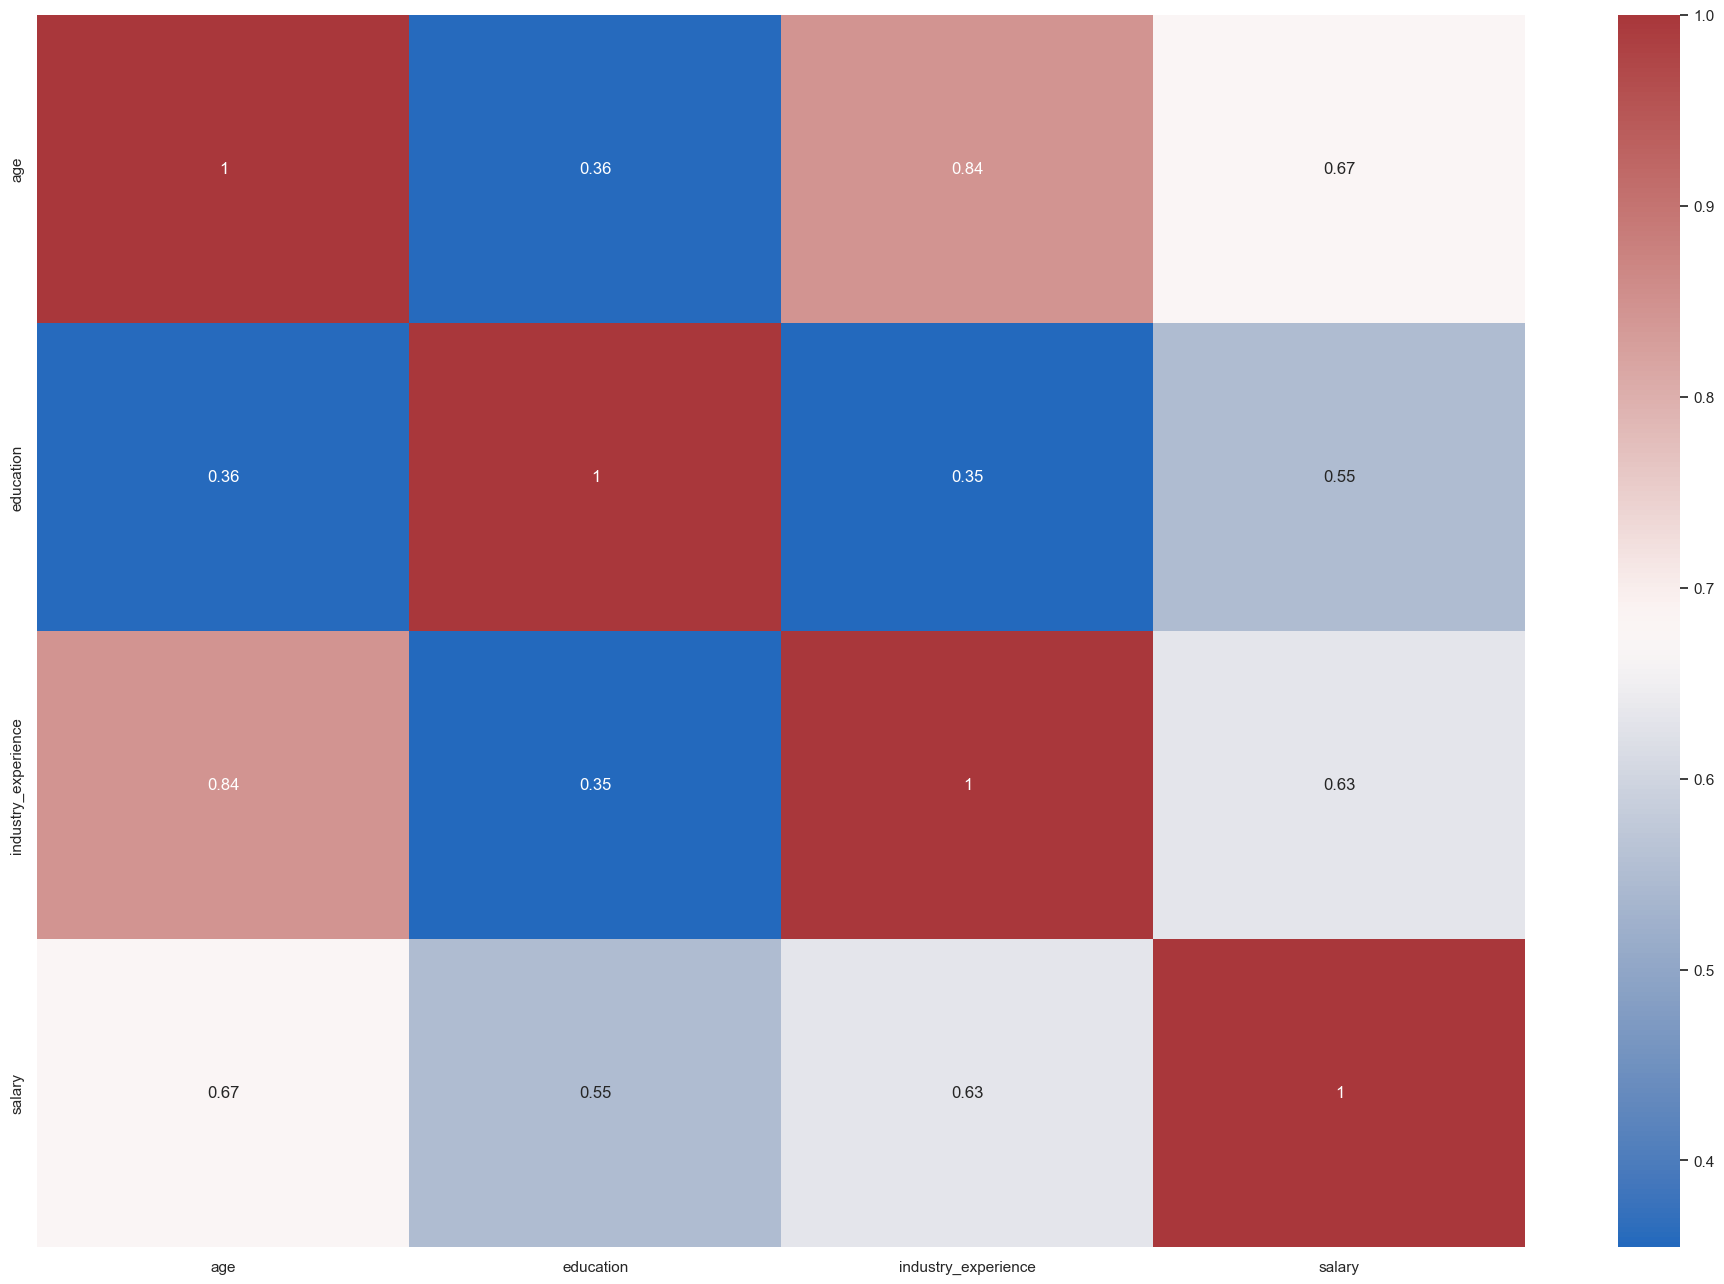

In [11]:
sns.heatmap(data=df_m.corr(), cmap=colors, annot=True)

<AxesSubplot:>

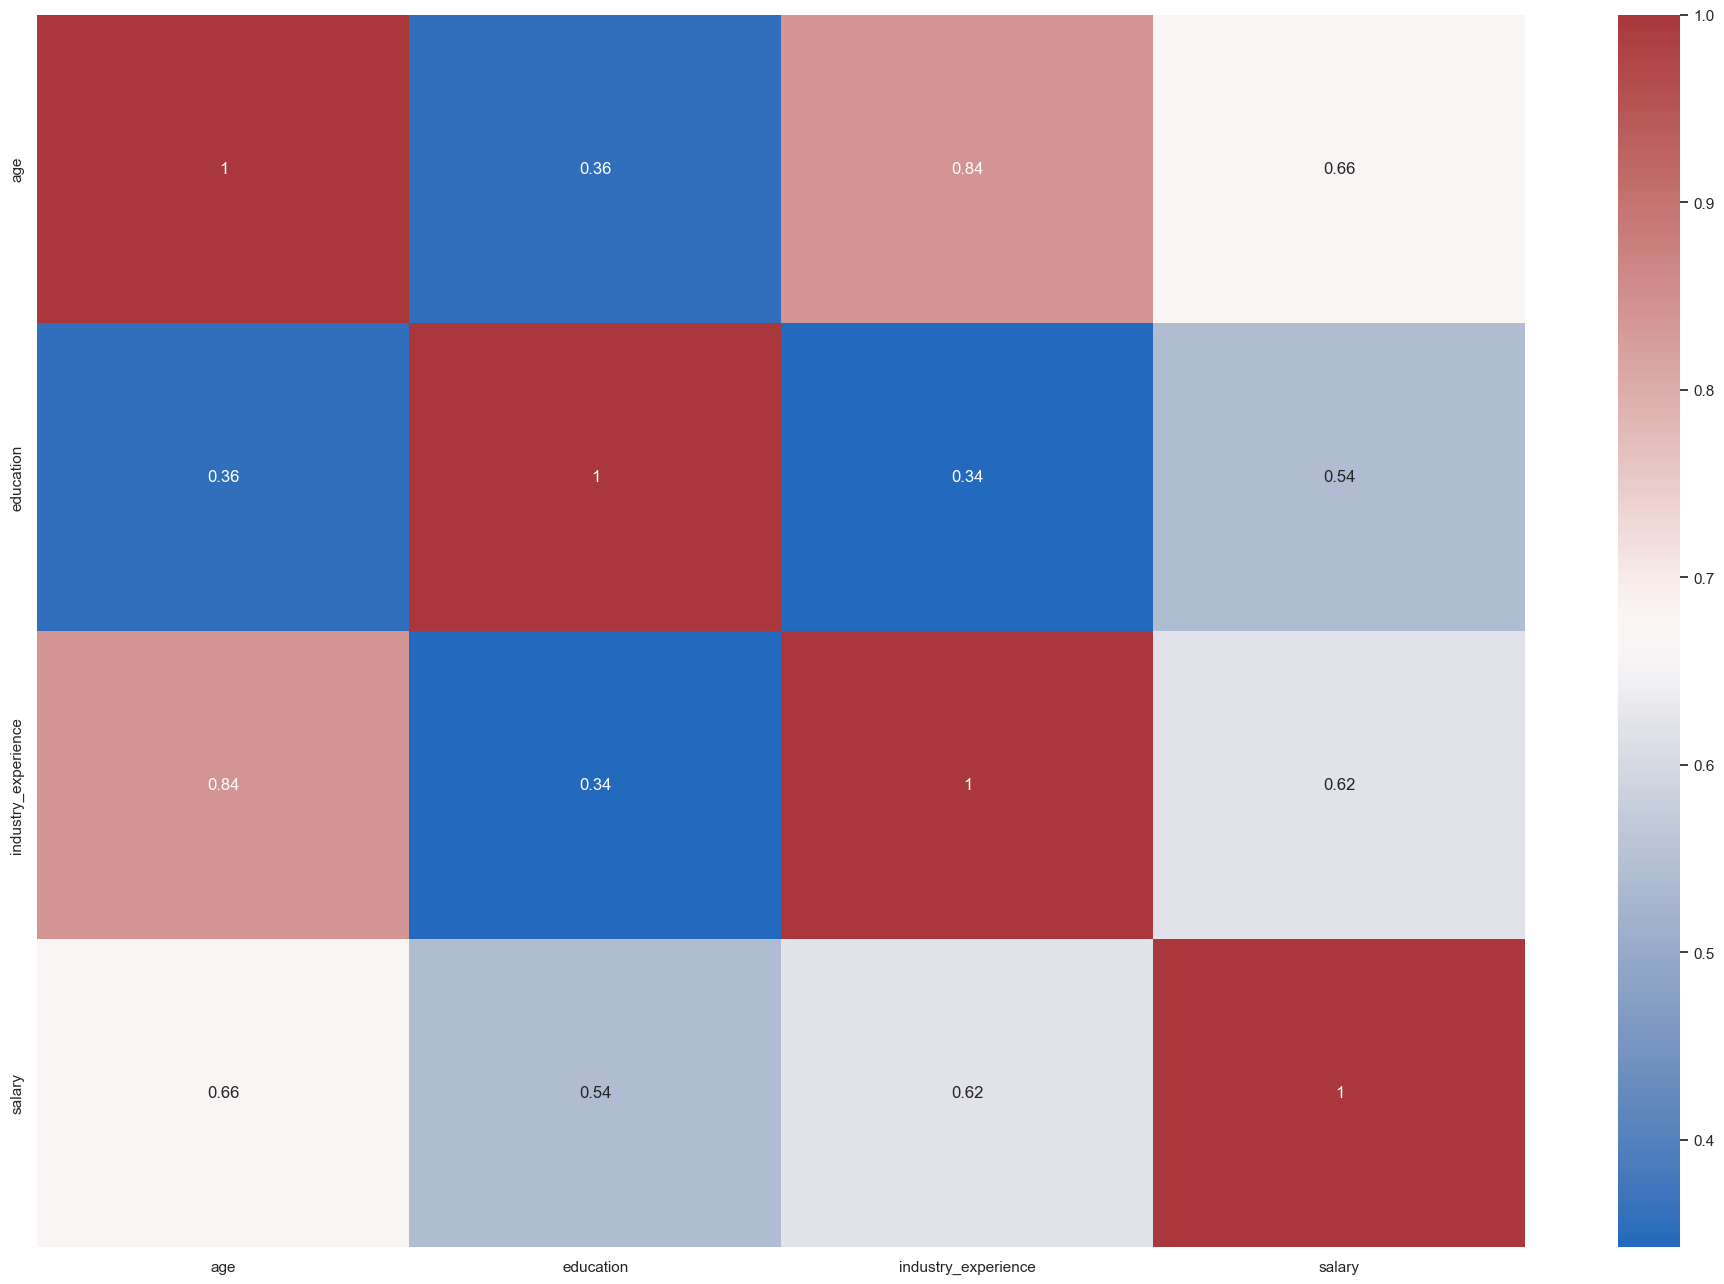

In [12]:
sns.heatmap(data=df_f.corr(), cmap=colors, annot=True)

<AxesSubplot:>

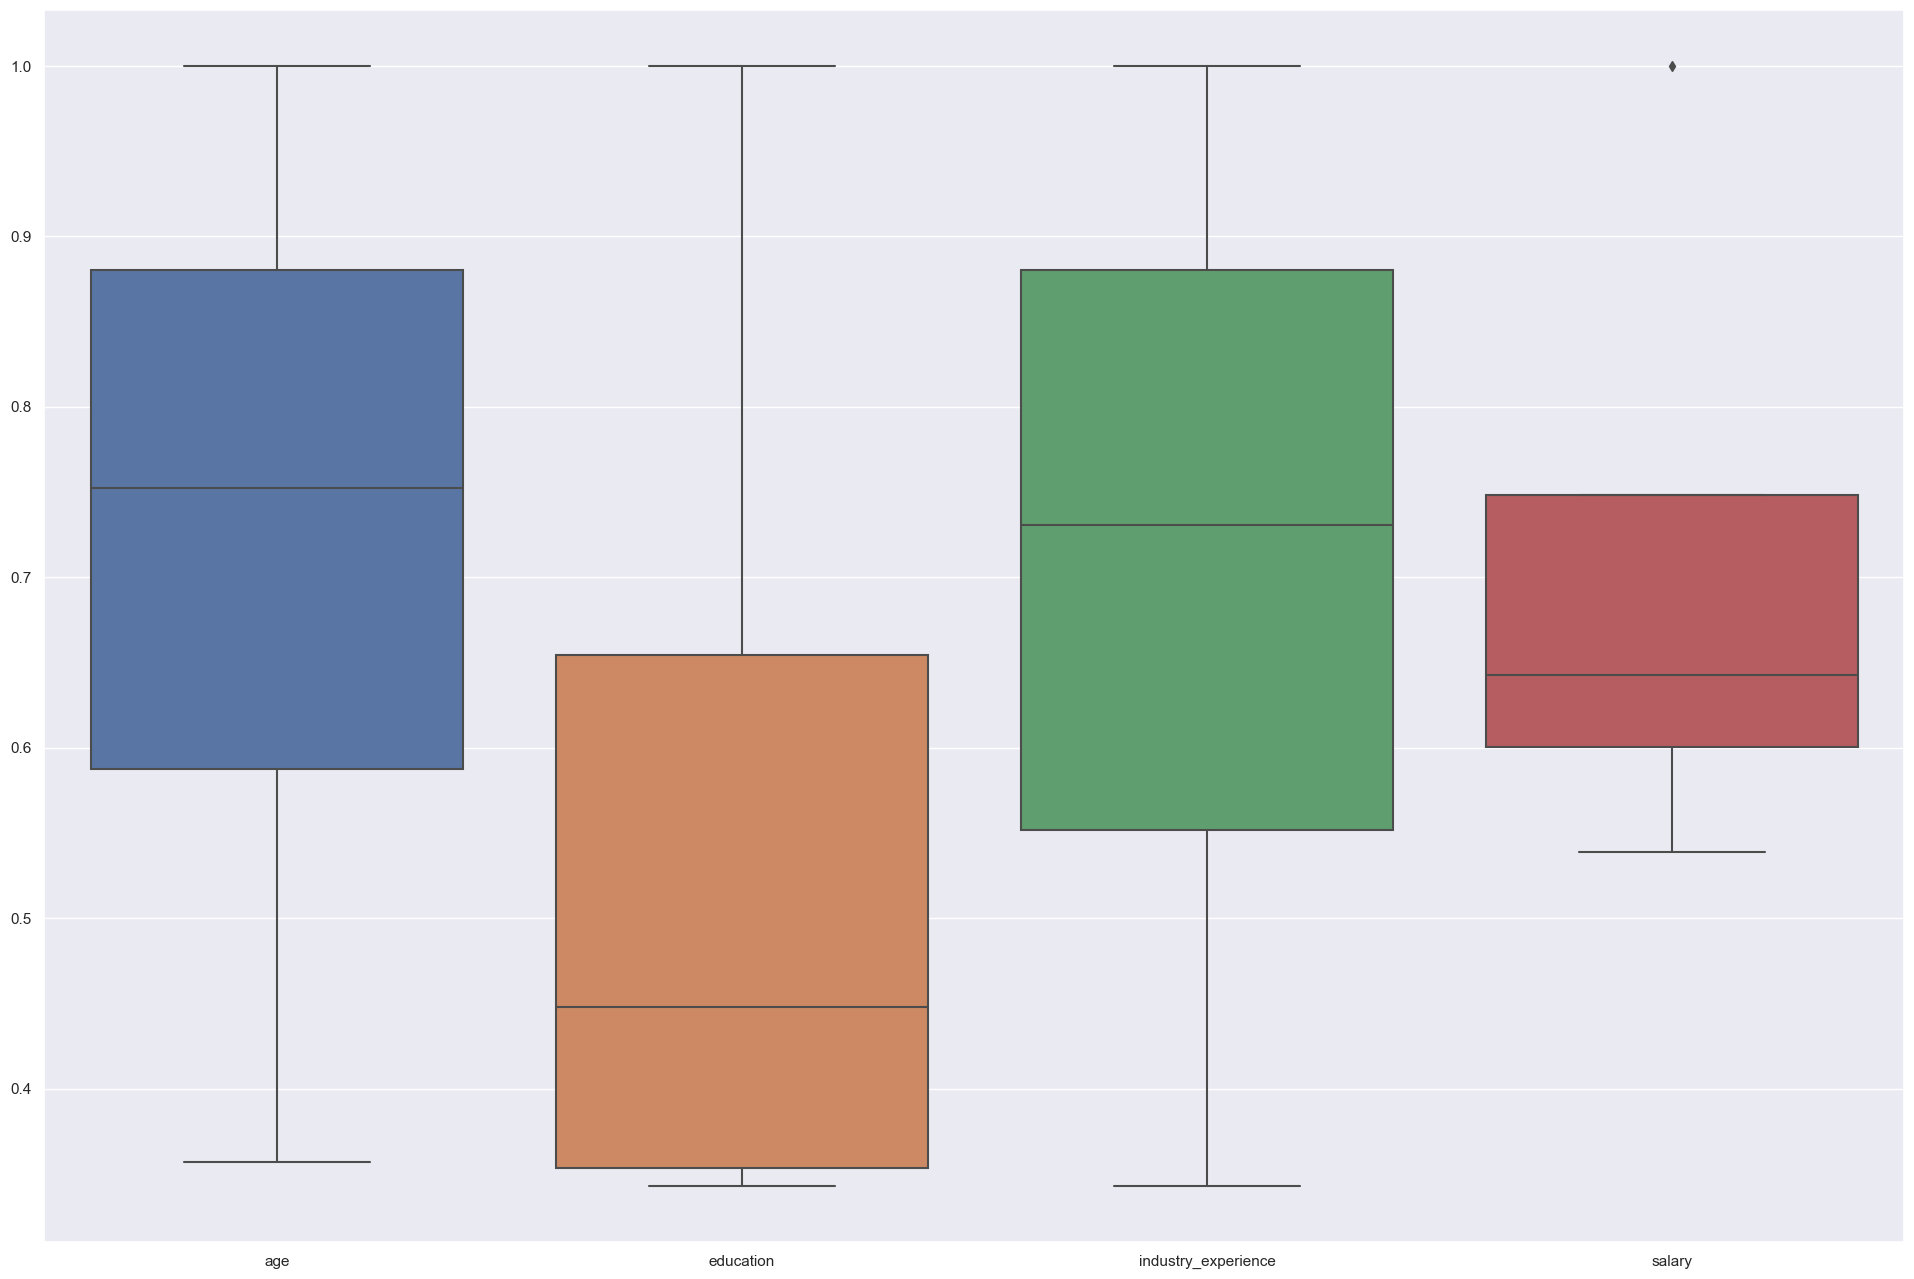

In [13]:
sns.boxplot(data=df_f.corr())

<AxesSubplot:>

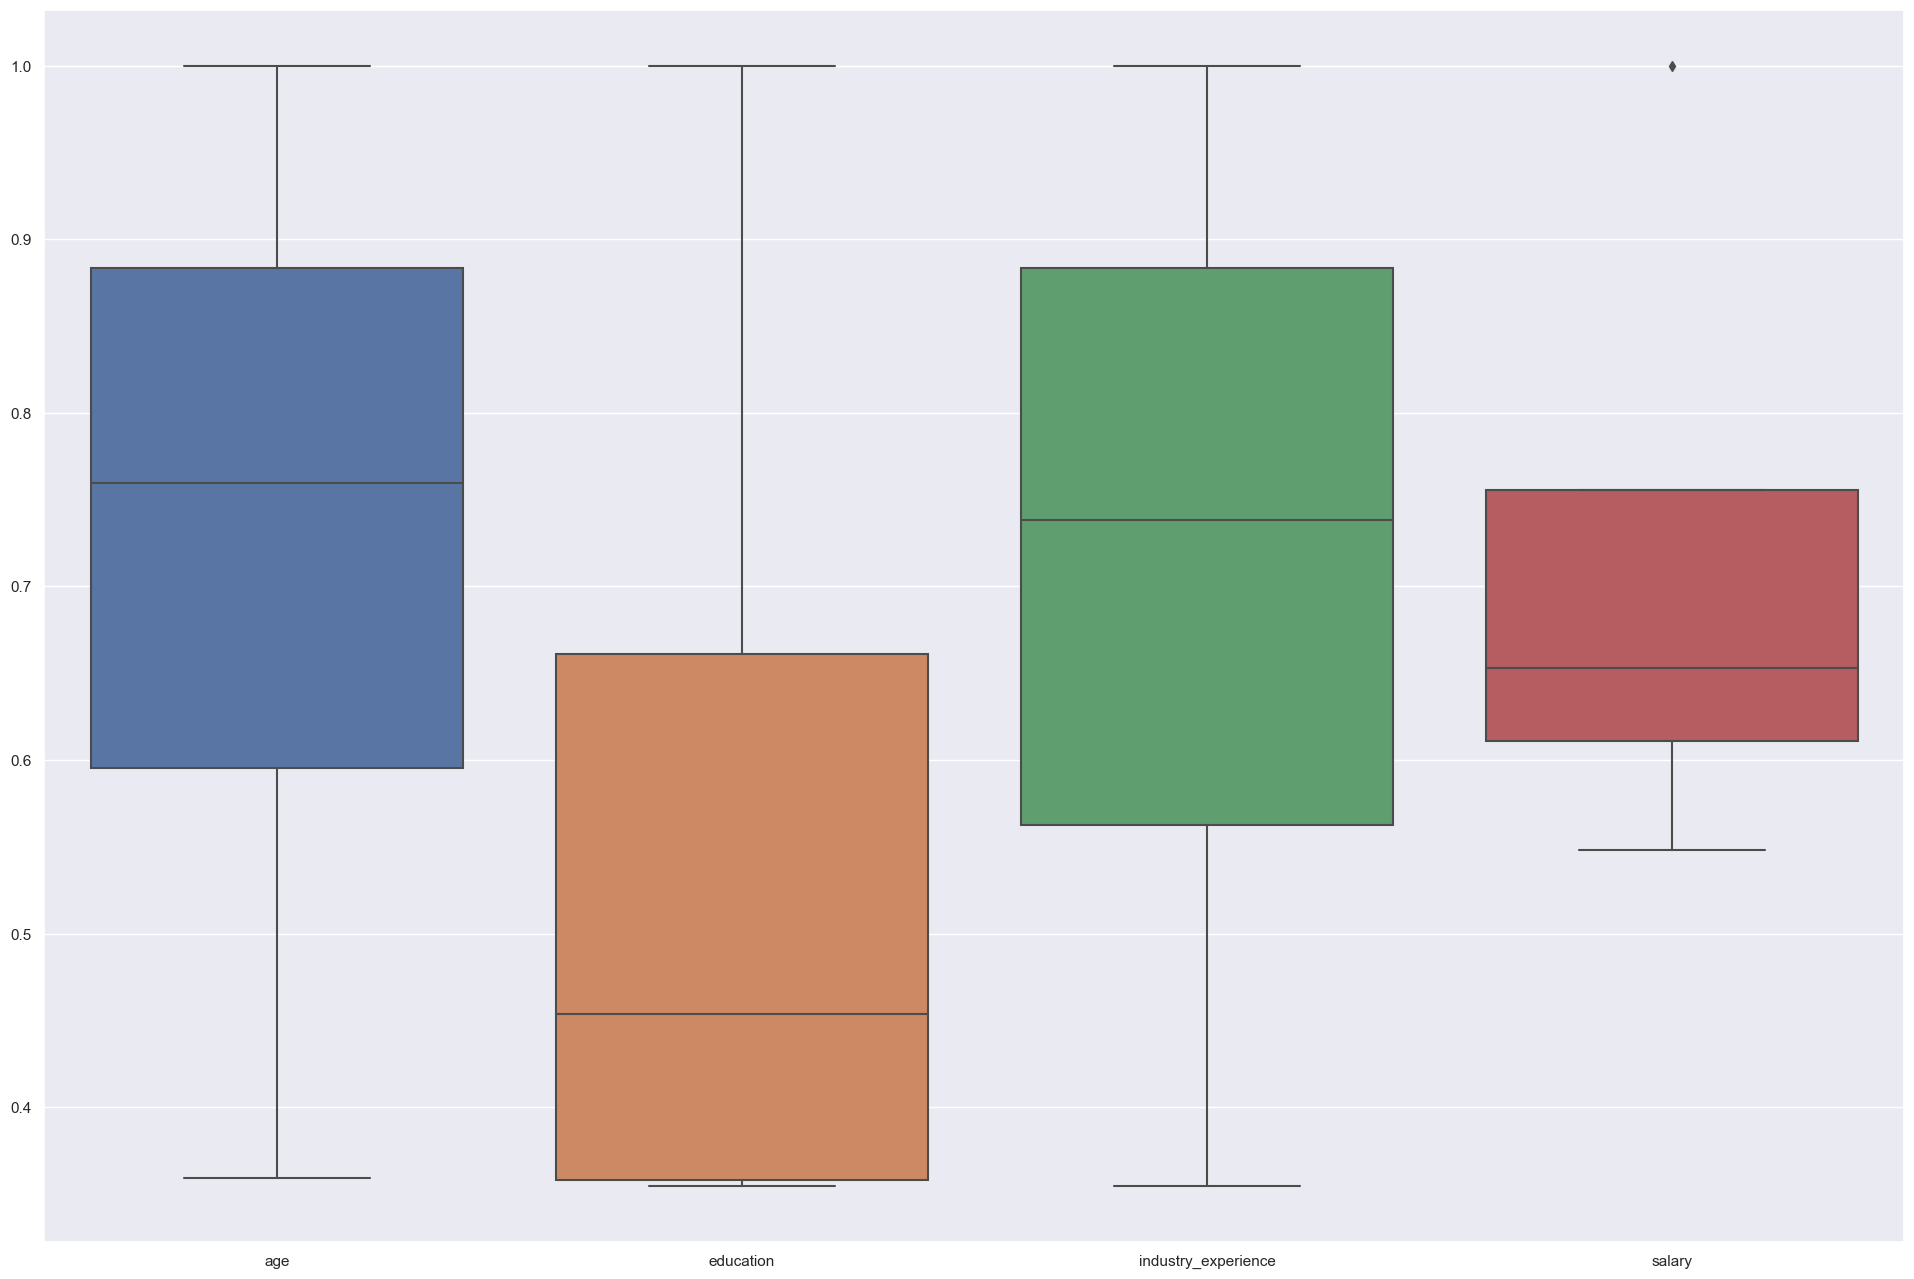

In [14]:
sns.boxplot(data=df_m.corr())

<AxesSubplot:xlabel='industry_experience', ylabel='salary'>

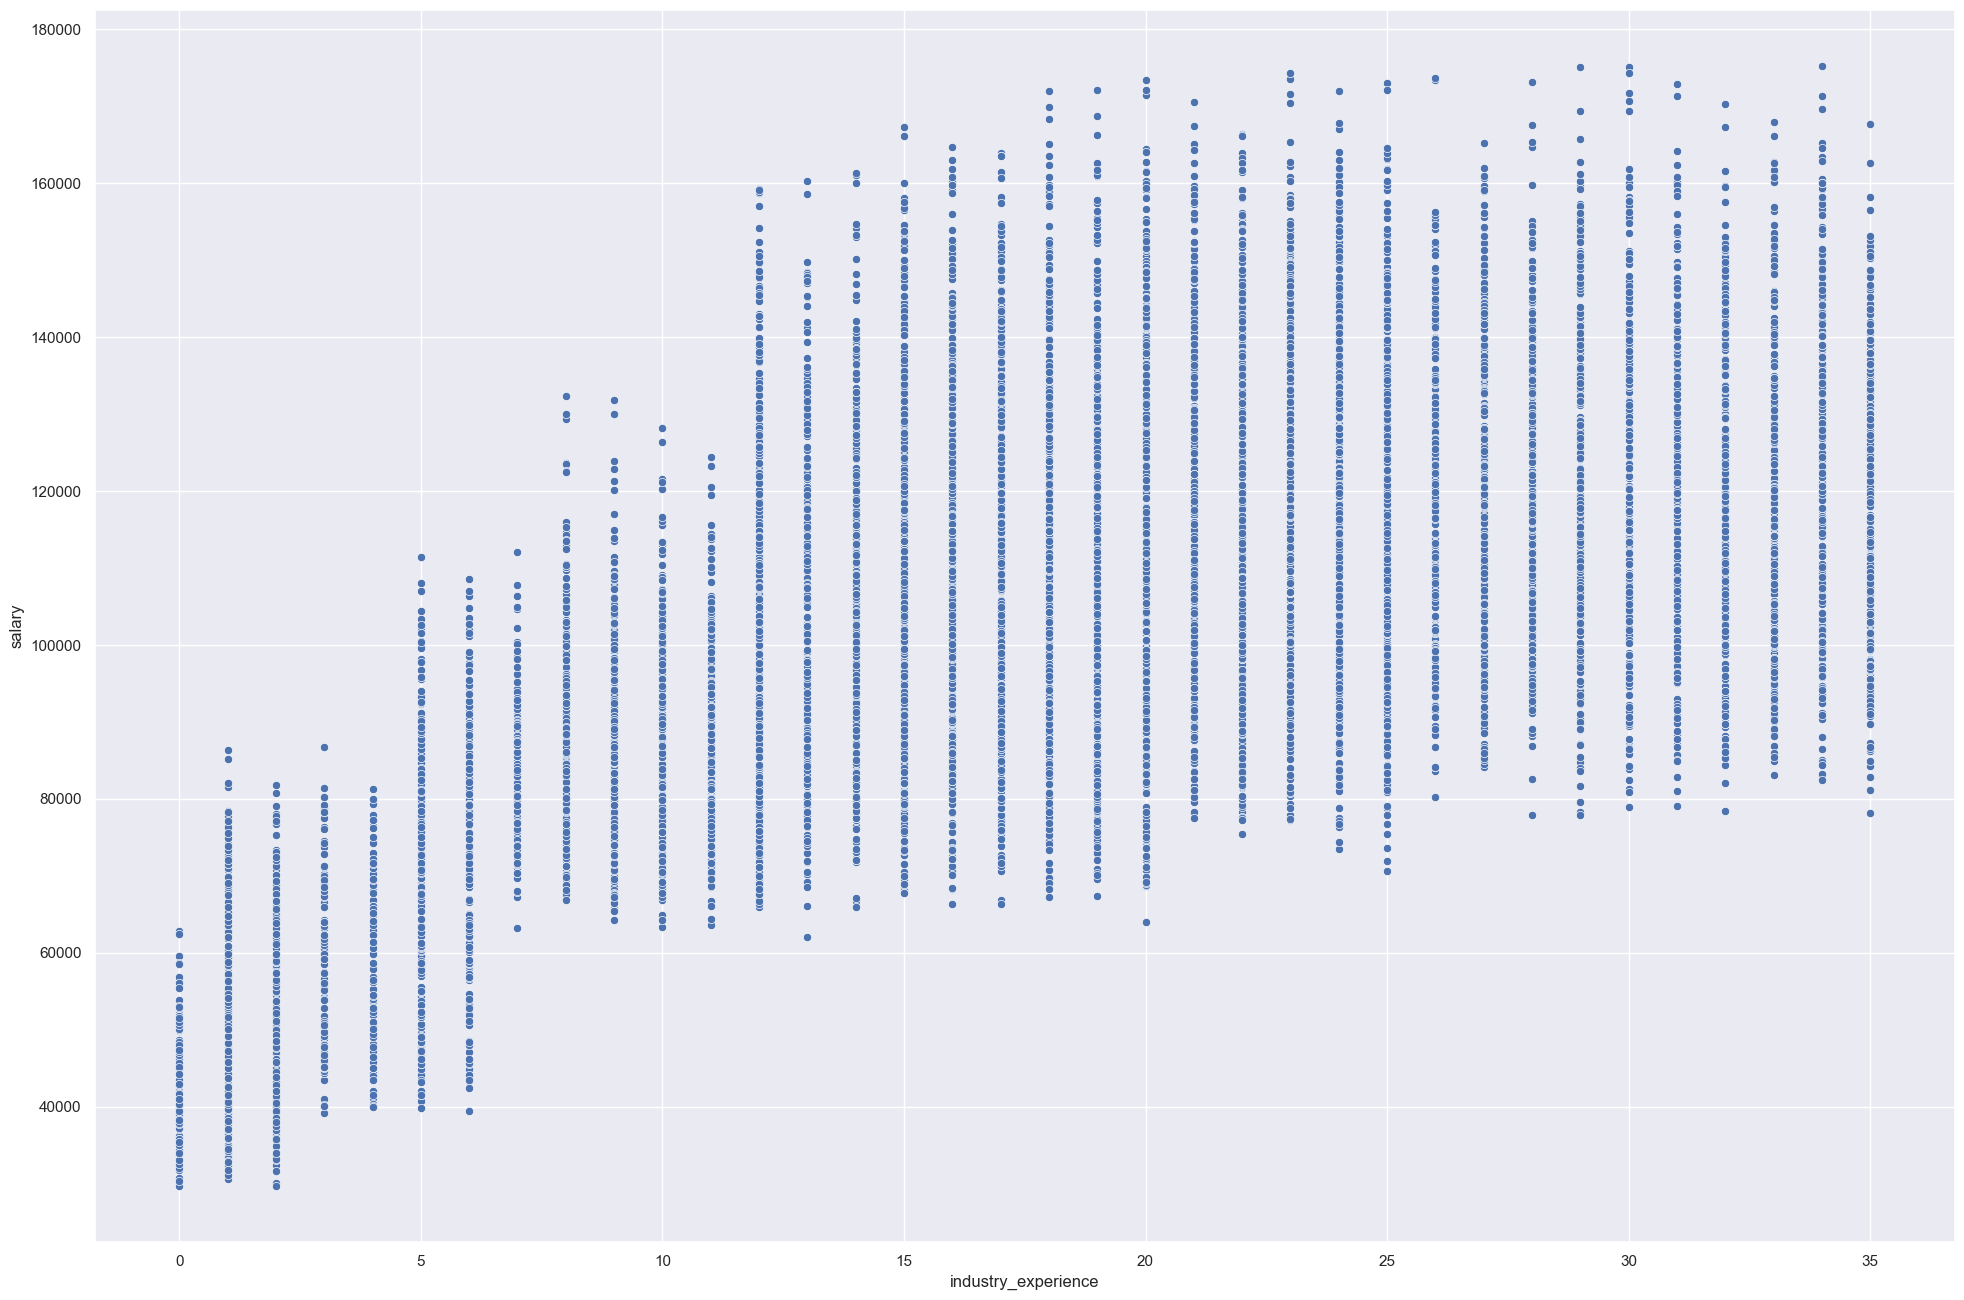

In [15]:
sns.scatterplot(data=df_m, x="industry_experience", y="salary")

<AxesSubplot:xlabel='industry_experience', ylabel='salary'>

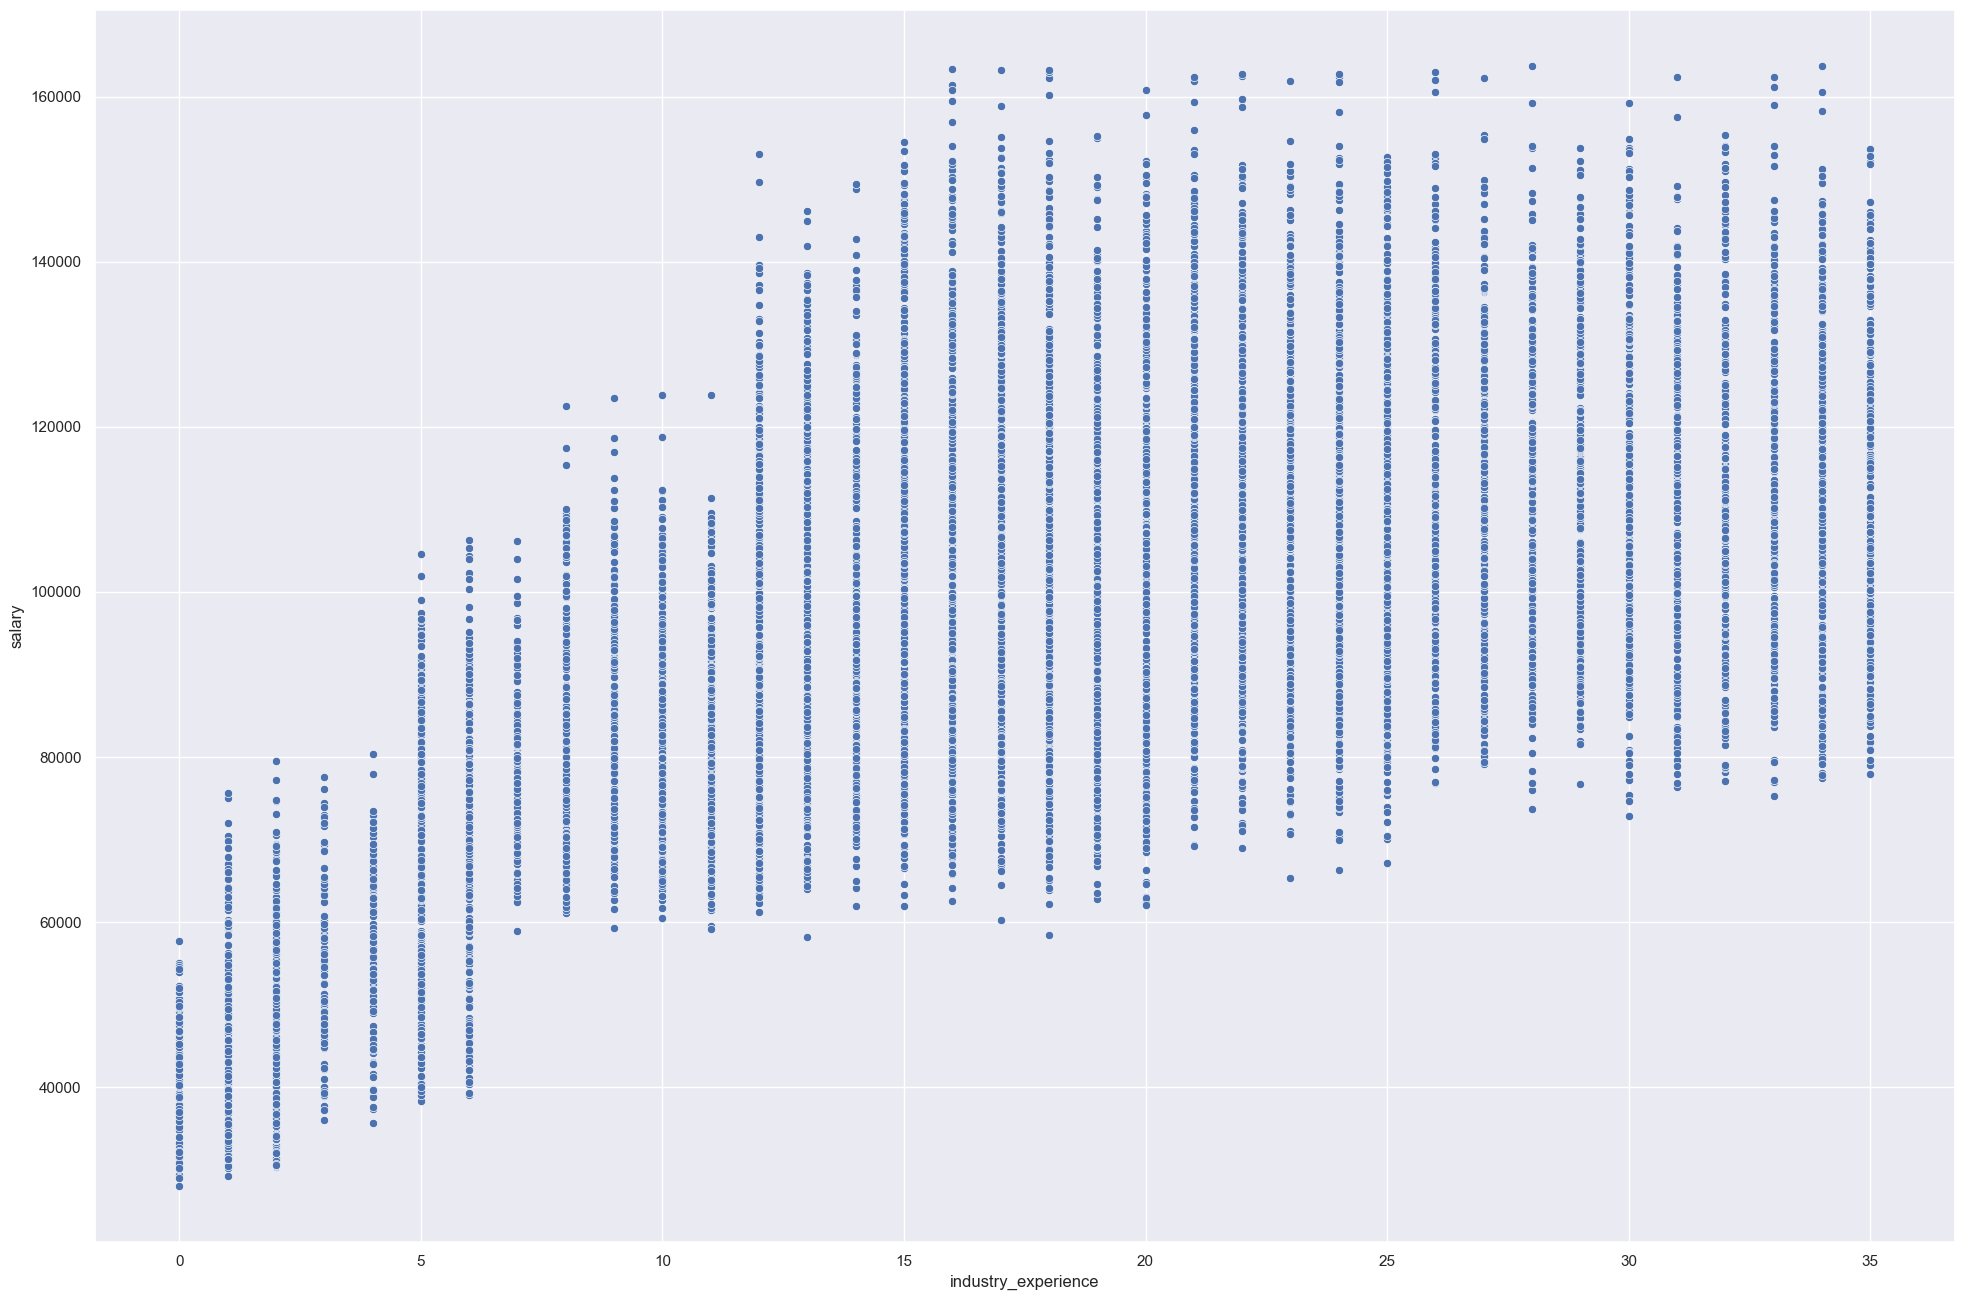

In [16]:
sns.scatterplot(data=df_f, x='industry_experience', y='salary')

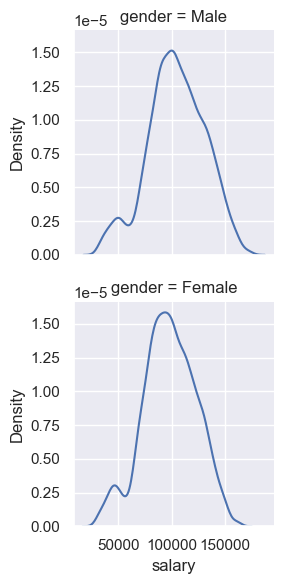

In [17]:
salary_graph_gender_gap = sns.FacetGrid(df, row='gender')
salary_graph_gender_gap.map(sns.kdeplot, 'salary')

In [18]:
print(df_m.describe())
print(df_f.describe())

                age     education  industry_experience         salary
count  12709.000000  12709.000000         12709.000000   12709.000000
mean      46.139035     16.209458            18.360925  104627.368954
std       12.846419      1.611222             8.970668   26867.859585
min       18.000000     12.000000             0.000000   29725.182000
25%       36.000000     16.000000            12.000000   87625.190000
50%       47.000000     16.000000            19.000000  104240.078800
75%       57.000000     18.000000            25.000000  123838.300800
max       67.000000     18.000000            35.000000  175223.321900
                age     education  industry_experience        salary
count  12730.000000  12730.000000         12730.000000   12730.00000
mean      46.299764     16.216654            18.475805   98209.92881
std       12.670439      1.612429             8.862569   24978.23386
min       18.000000     12.000000             0.000000   28054.08000
25%       36.000000     1

In [19]:
print(98209.92881 / 104627.368954)

0.9386638485880164


In [20]:
data = {'age': [df_m.age.mean(), df_f.age.mean()],
        'education': [df_m.education.mean(), df_f.education.mean()],
        'industry_experience': [df_m.industry_experience.mean(), df_f.industry_experience.mean()],
        'salary': [df_m.salary.mean(), df_f.salary.mean()],
        'gender': ['male', 'female']
       }

df_m_f_mean = pd.DataFrame(data=data)

In [21]:
df_m_f_mean.head()

,age,education,industry_experience,salary,gender
0,46.139035,16.209458,18.360925,104627.368954,male
1,46.299764,16.216654,18.475805,98209.928810,female


In [22]:
data_m = {'age': [df_m.age.mean()],
        'education': [df_m.education.mean()],
        'industry_experience': [df_m.industry_experience.mean()],
        'salary': [df_m.salary.mean()],
          'gender': 'male'
       }
df_m_mean = pd.DataFrame(data=data_m)

data_f = {'age': [df_f.age.mean()],
        'education': [df_f.education.mean()],
        'industry_experience': [df_f.industry_experience.mean()],
        'salary': [df_f.salary.mean()],
          'gender': 'female'
       }
df_f_mean = pd.DataFrame(data=data_f)

In [23]:
df_m_mean

,age,education,industry_experience,salary,gender
0,46.139035,16.209458,18.360925,104627.368954,male


In [24]:
df_m_f_mean

,age,education,industry_experience,salary,gender
0,46.139035,16.209458,18.360925,104627.368954,male
1,46.299764,16.216654,18.475805,98209.928810,female


In [25]:
df_m_f_mean_pivot = df_m_f_mean.pivot_table(columns='gender')

<AxesSubplot:xlabel='gender'>

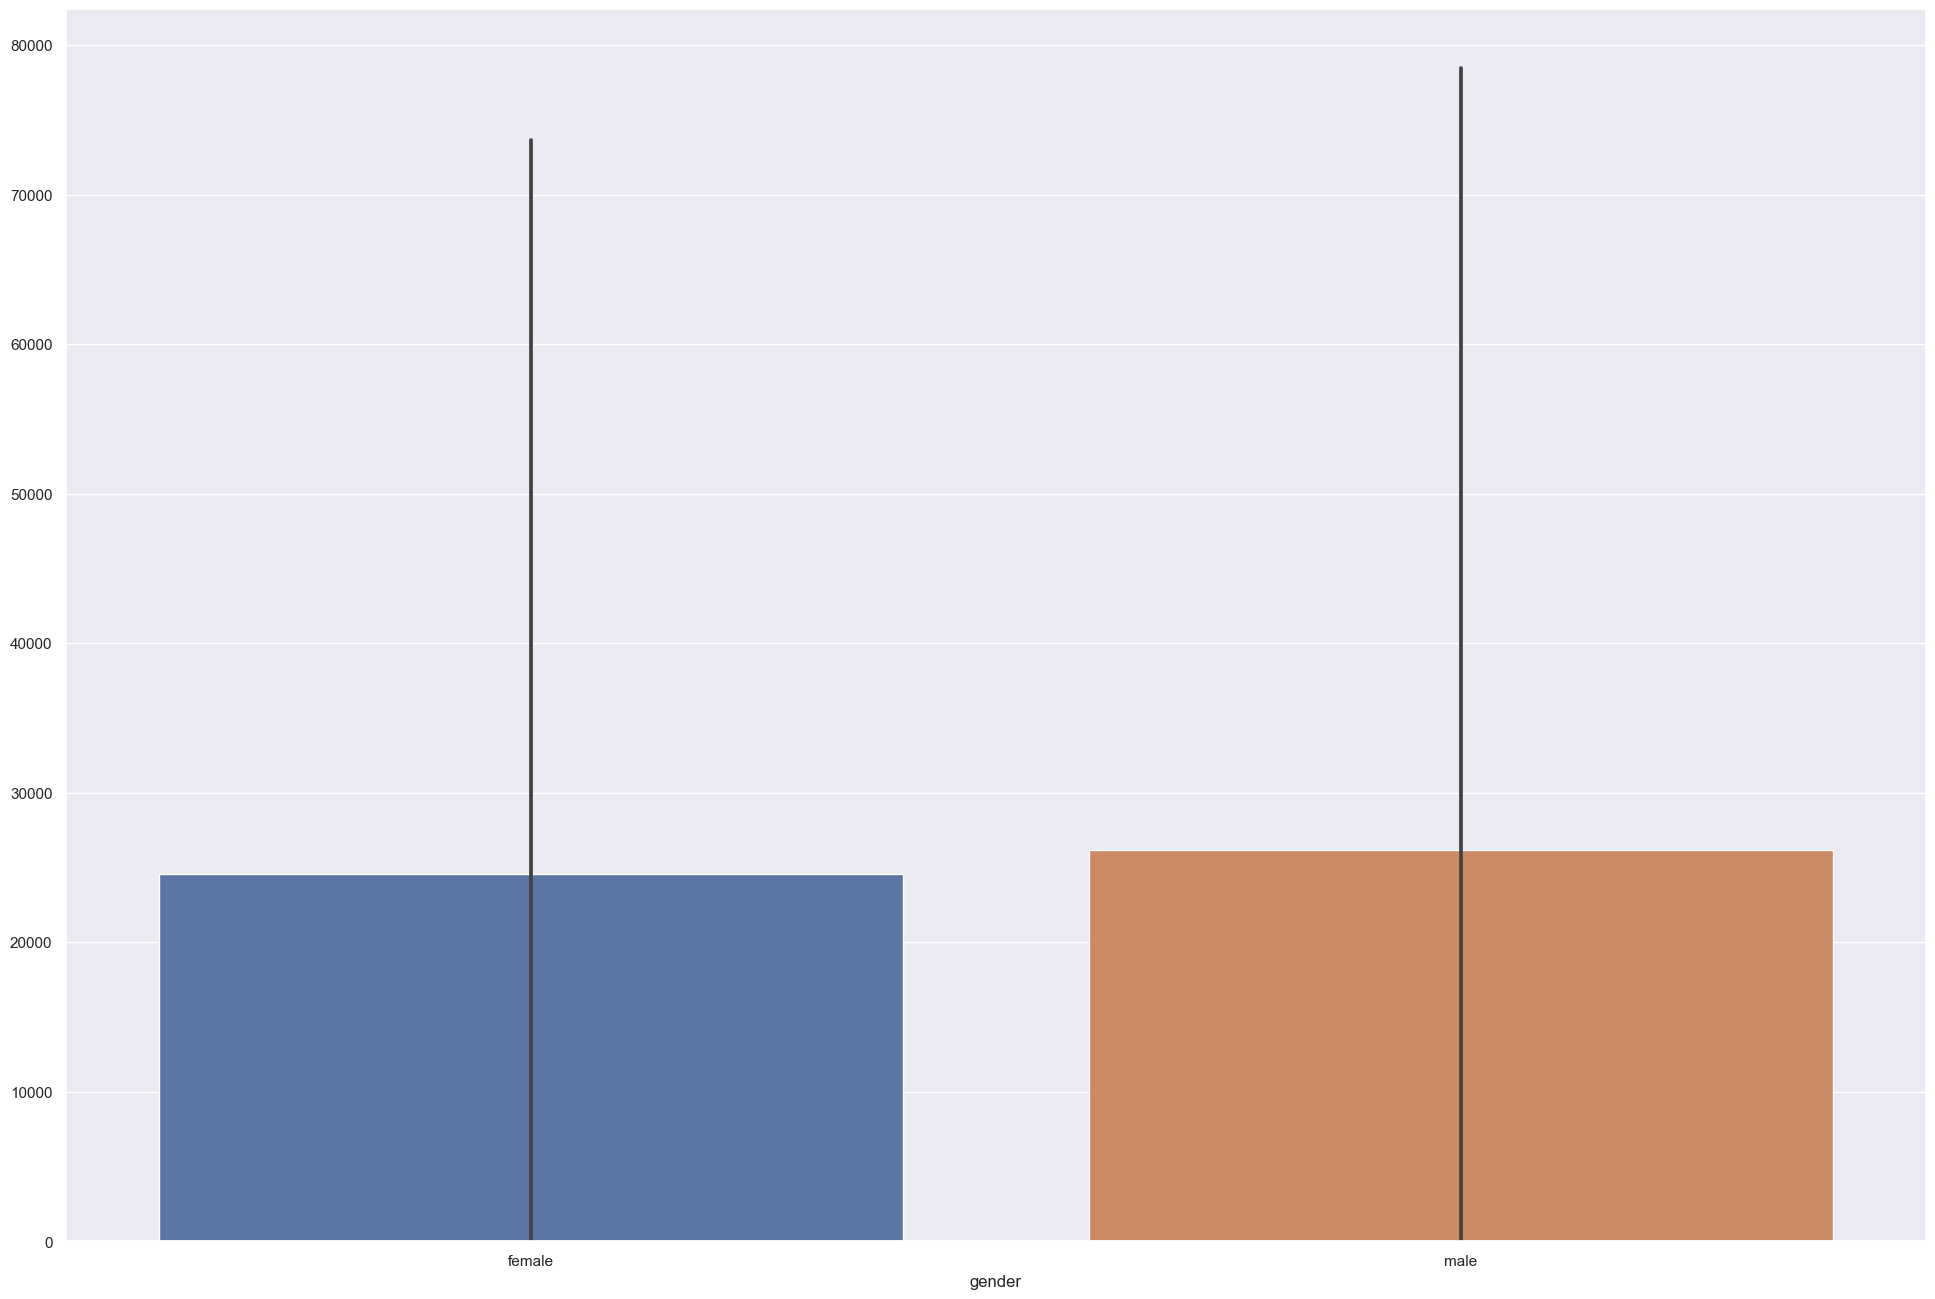

In [26]:
sns.barplot(data=df_m_f_mean_pivot)

In [27]:
df_m_f_mean_pivot.head()

gender,female,male
age,46.299764,46.139035
education,16.216654,16.209458
industry_experience,18.475805,18.360925
salary,98209.928810,104627.368954


In [28]:
# sns.barplot(data=df_m_f_mean, hue='gender')

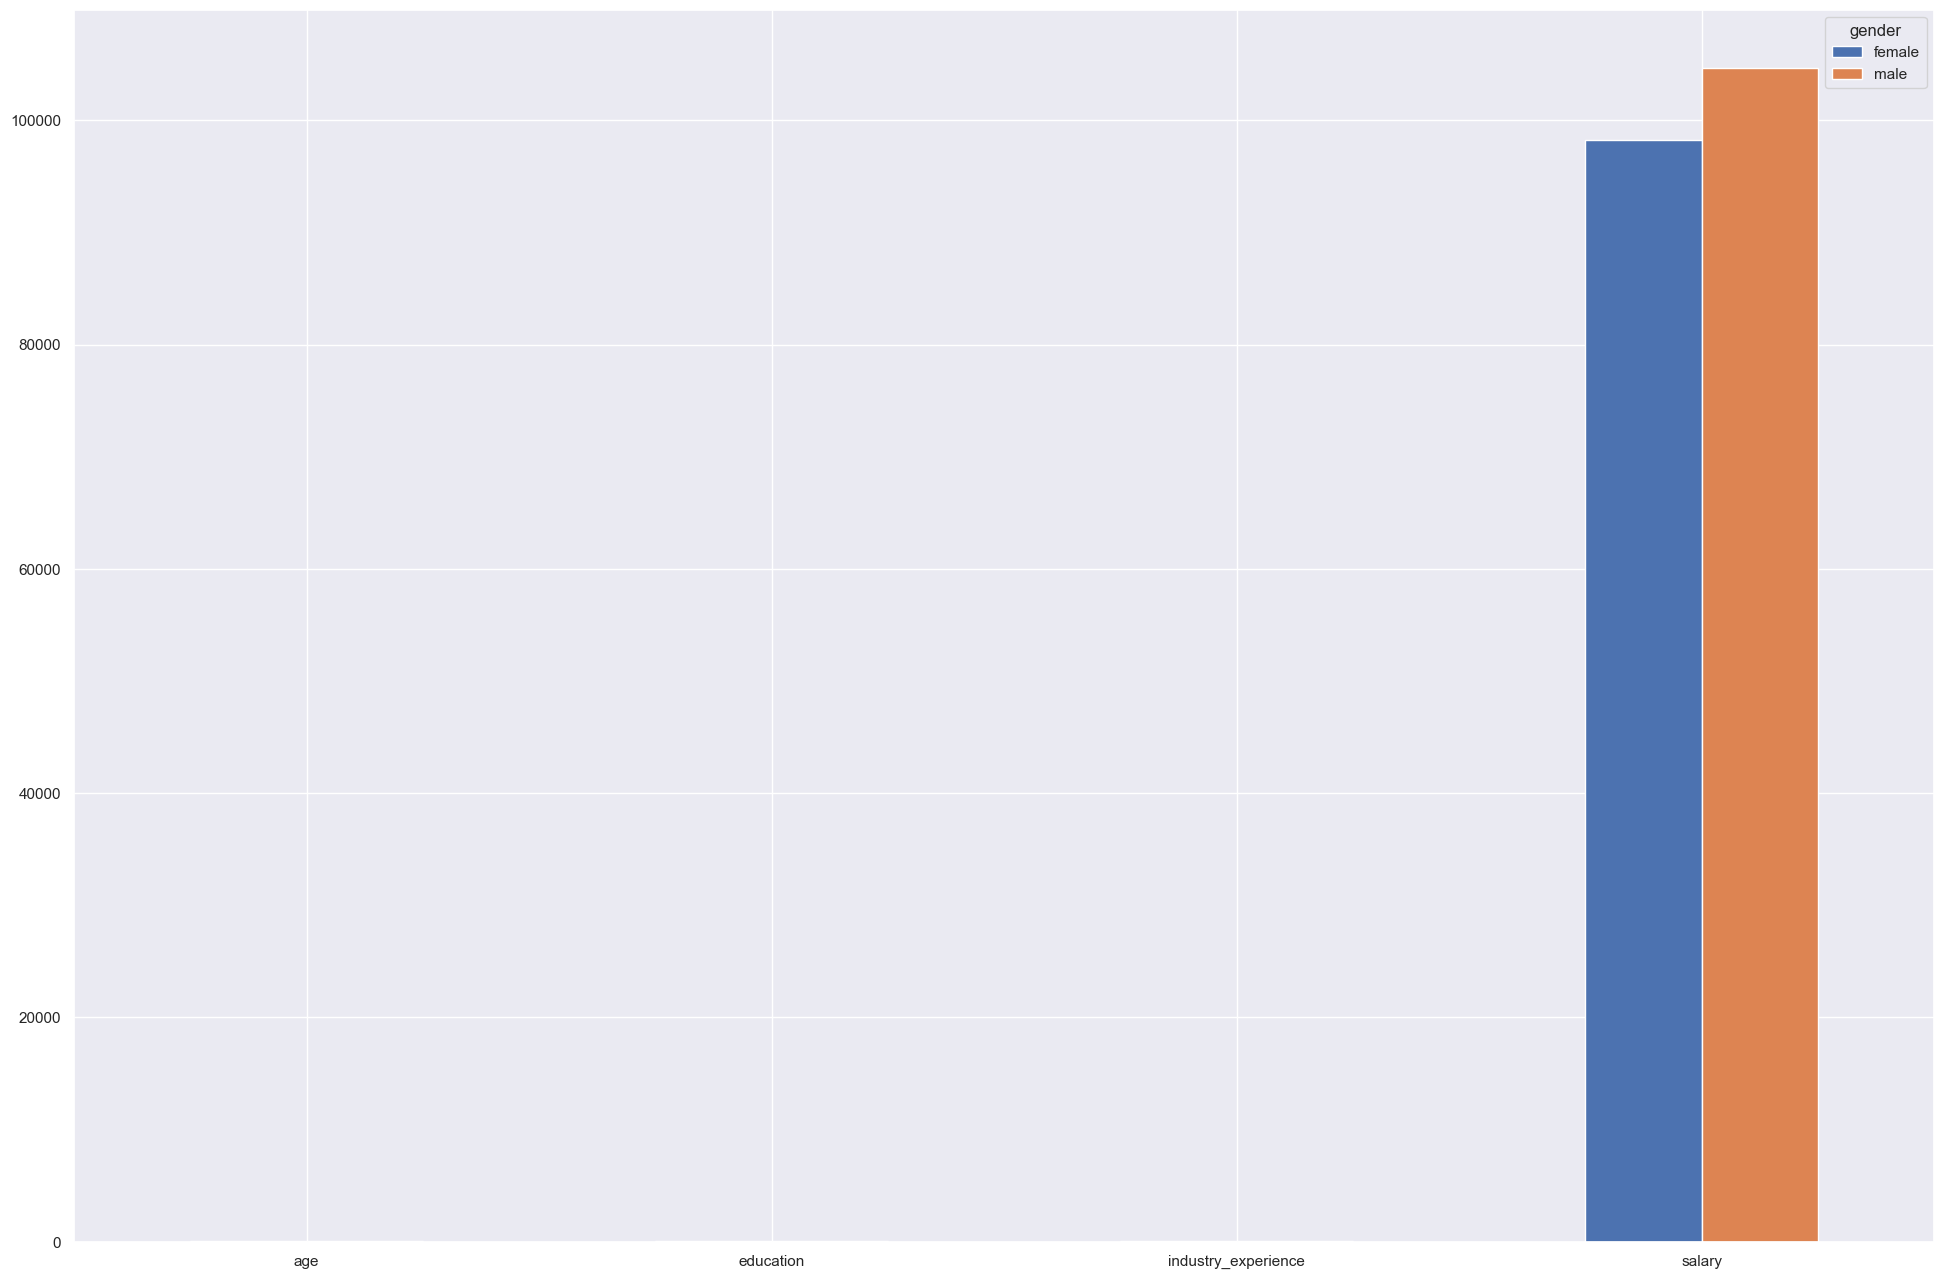

In [29]:
ax1 = df_m_f_mean_pivot.plot(kind='bar', rot=0)

In [30]:
df_gender_mean_no_salary = df_m_f_mean_pivot.drop('salary', axis=0)

<AxesSubplot:>

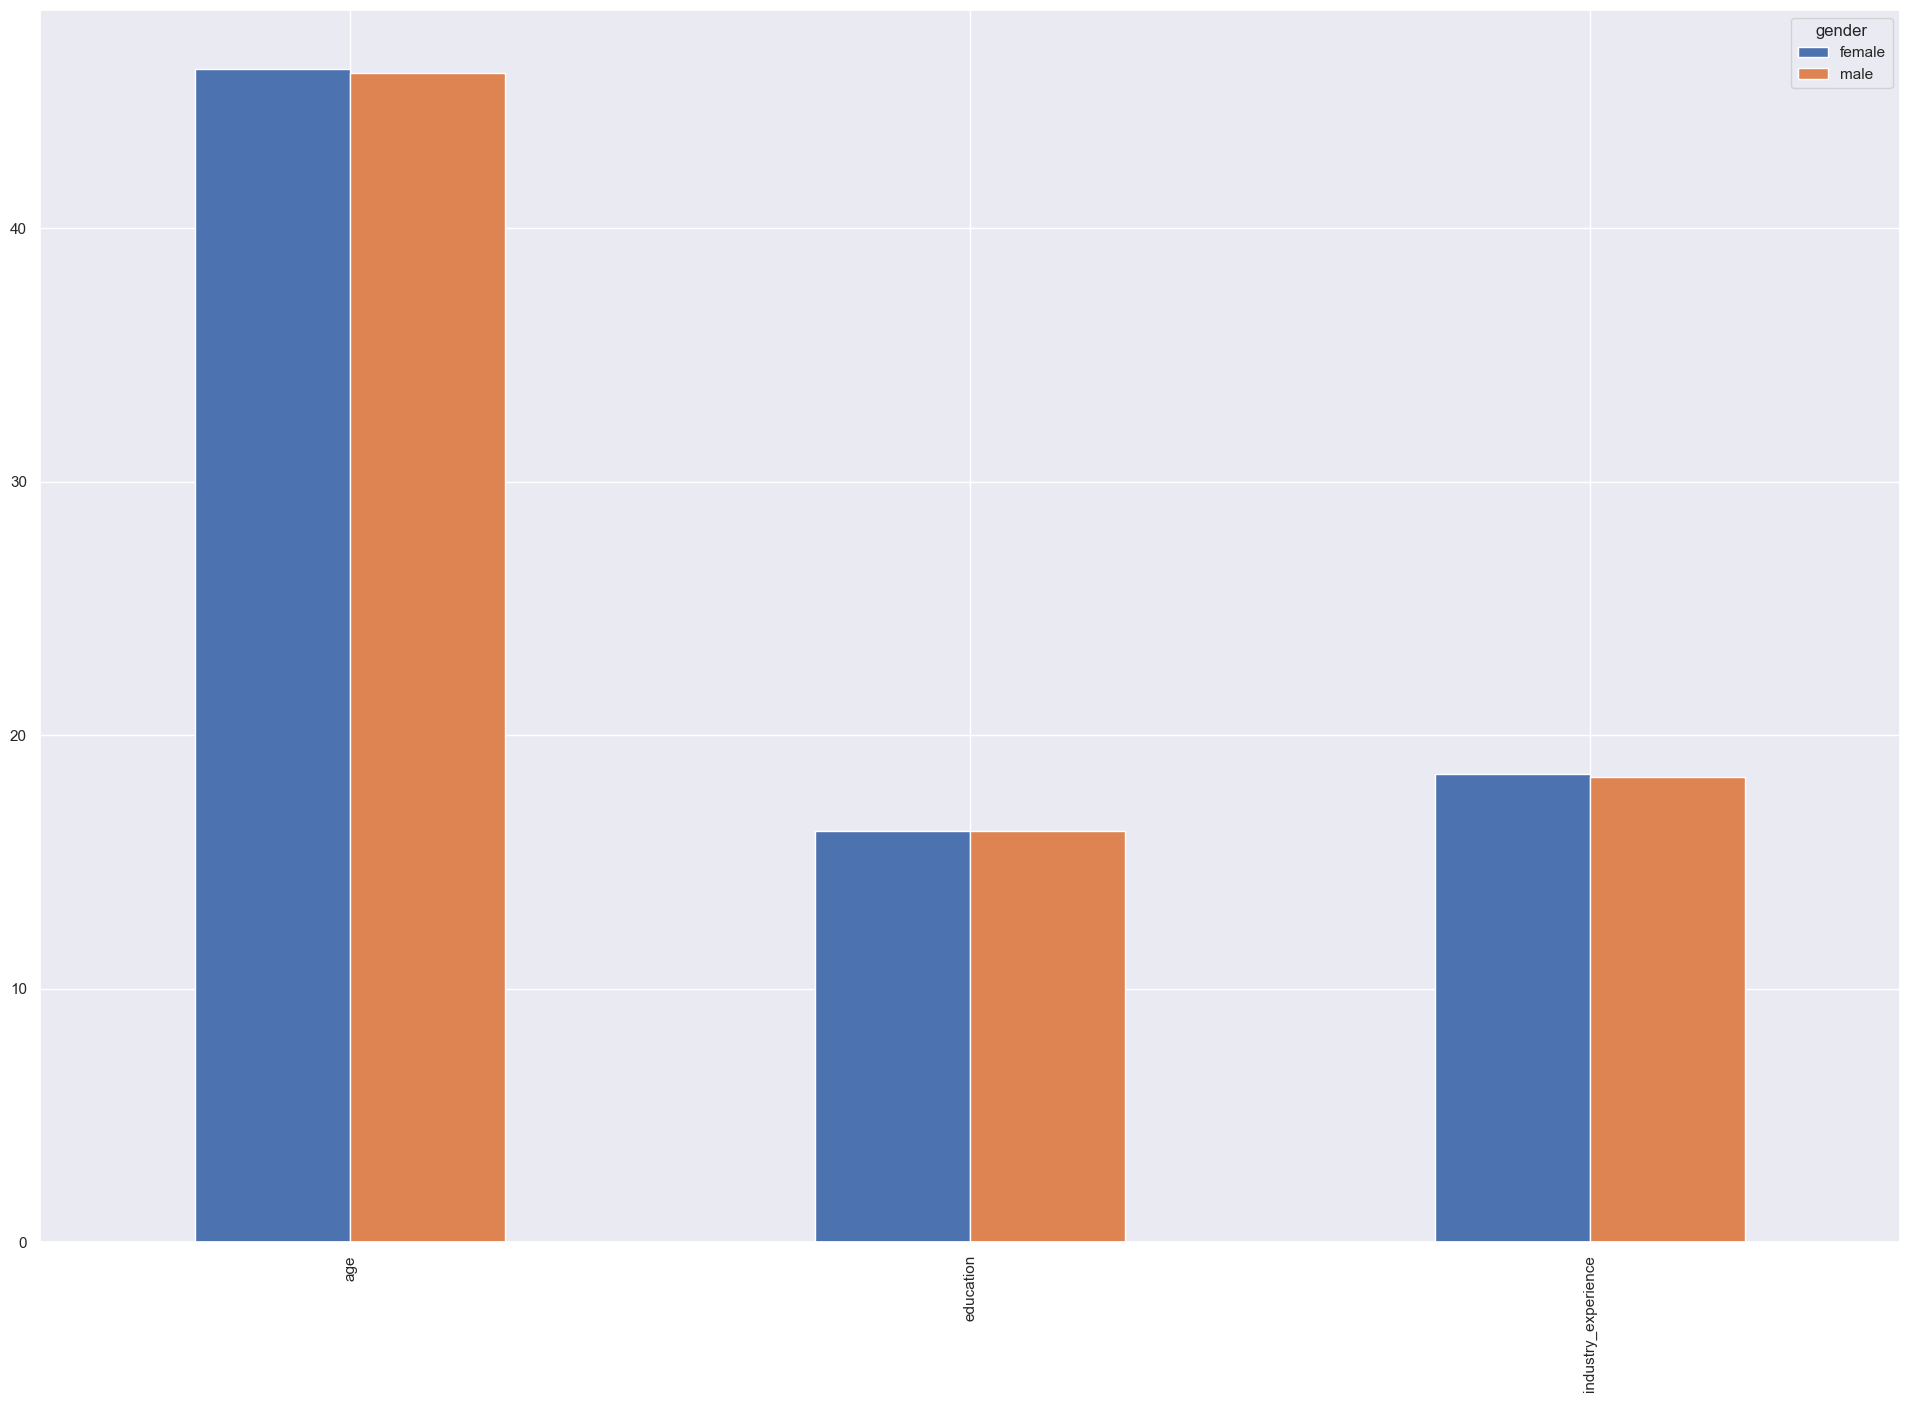

In [31]:
df_gender_mean_no_salary.plot(kind='bar')

In [32]:
# df_m_f_mean_pivot.salary.plot(kind='bar')

In [33]:
average_percent_diff = {'age': [df_m.age.mean() / df_f.age.mean() * 100, df_f.age.mean() / df_m.age.mean() * 100],
        'education': [df_m.education.mean() / df_f.education.mean() * 100, df_f.education.mean() / df_m.education.mean() * 100],
        'industry_experience': [df_m.industry_experience.mean() / df_f.industry_experience.mean() * 100, df_f.industry_experience.mean() / df_m.industry_experience.mean() * 100],
        'salary': [df_m.salary.mean() / df_f.salary.mean() * 100, df_f.salary.mean() / df_m.salary.mean() * 100],
        'gender': ['Male/Female', 'Female/Male']
       }

df_gender_diff = pd.DataFrame(data=average_percent_diff)

In [34]:
df_gender_diff

,age,education,industry_experience,salary,gender
0,99.652851,99.955628,99.378215,106.534411,Male/Female
1,100.348358,100.044392,100.625676,93.866385,Female/Male


<AxesSubplot:>

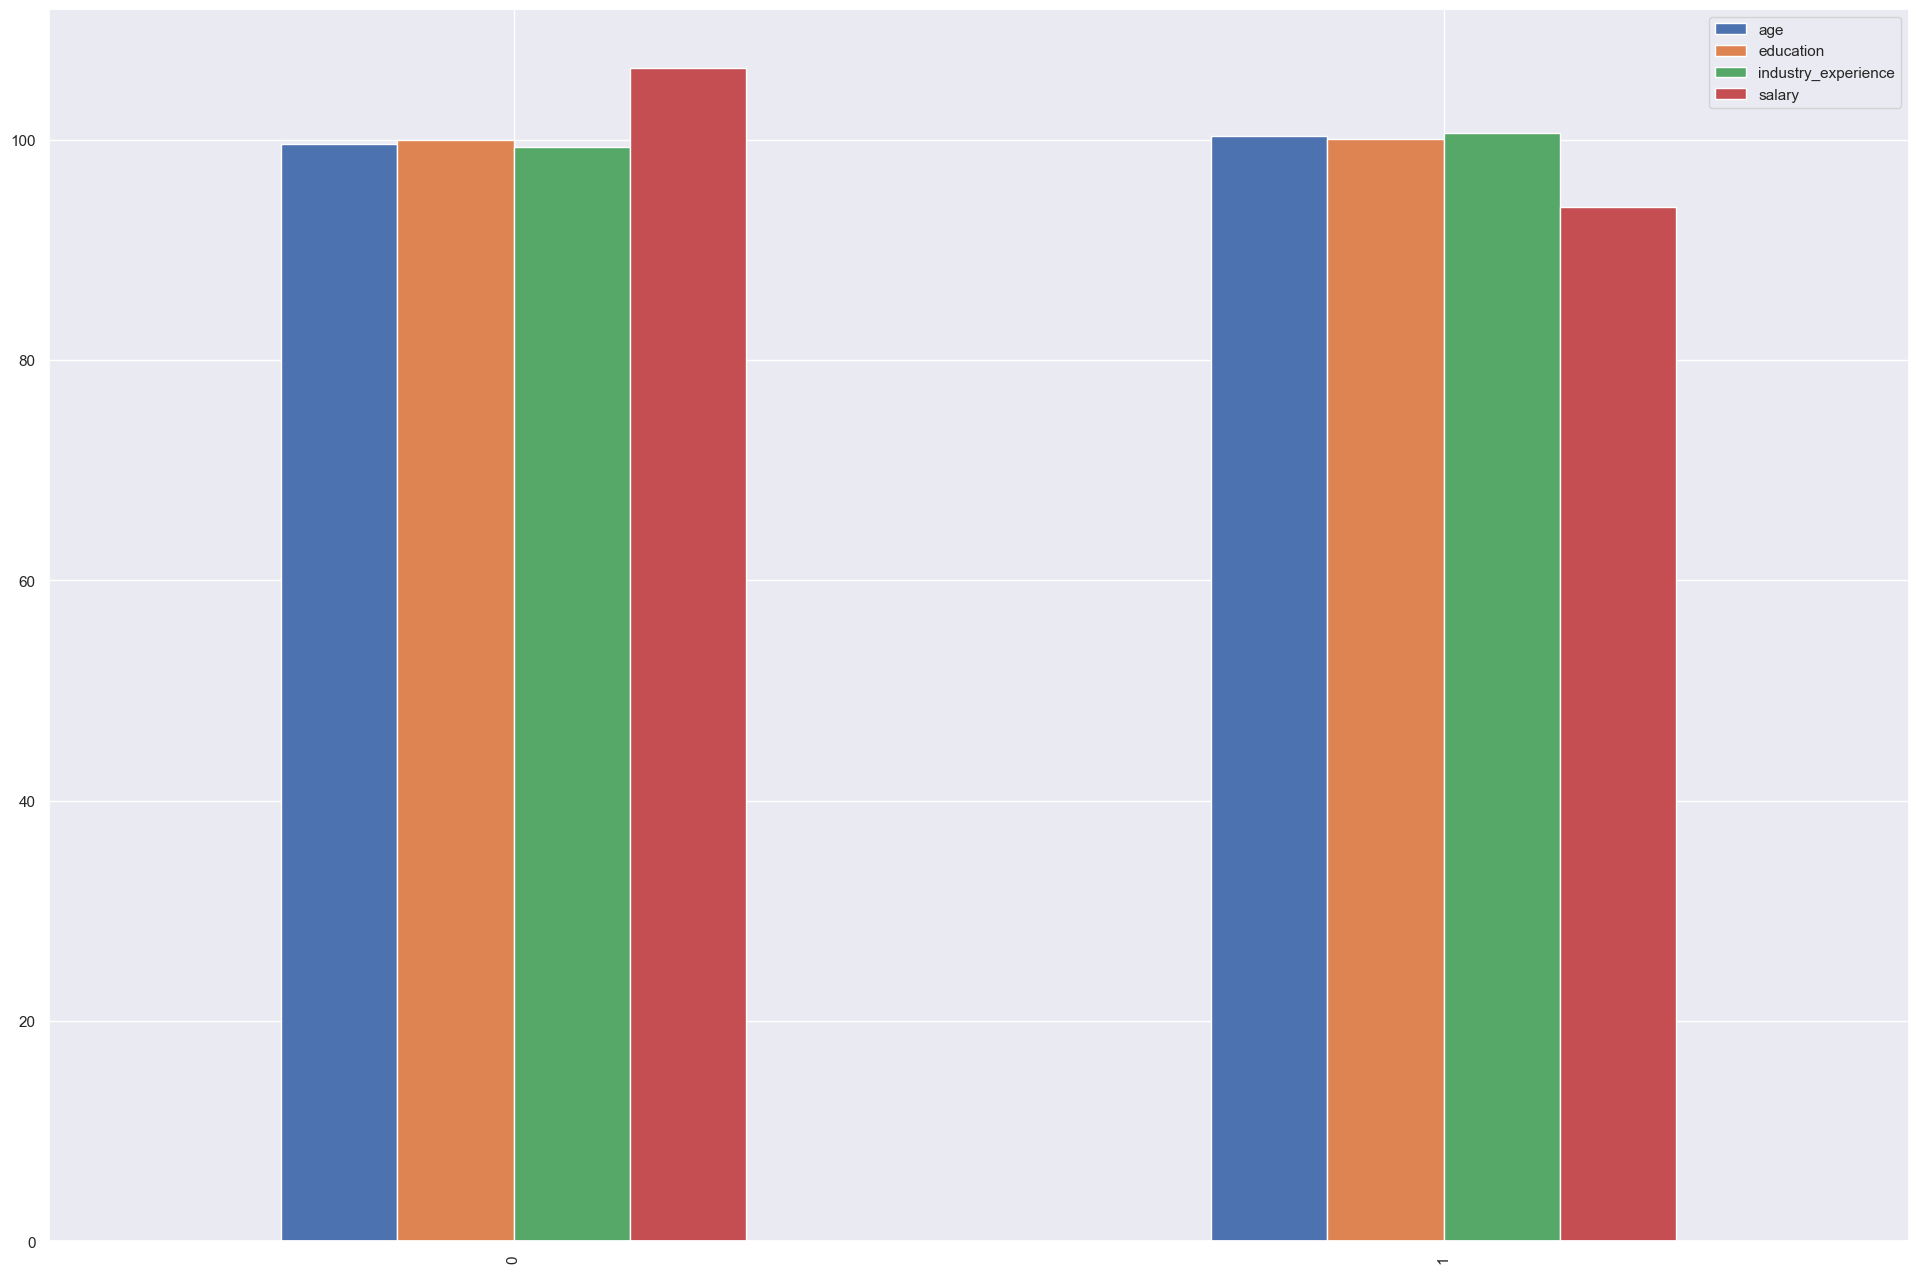

In [35]:
df_gender_diff.plot(kind='bar')

In [36]:
df_gender_diff_pivot = df_gender_diff.pivot_table(columns="gender")

<AxesSubplot:>

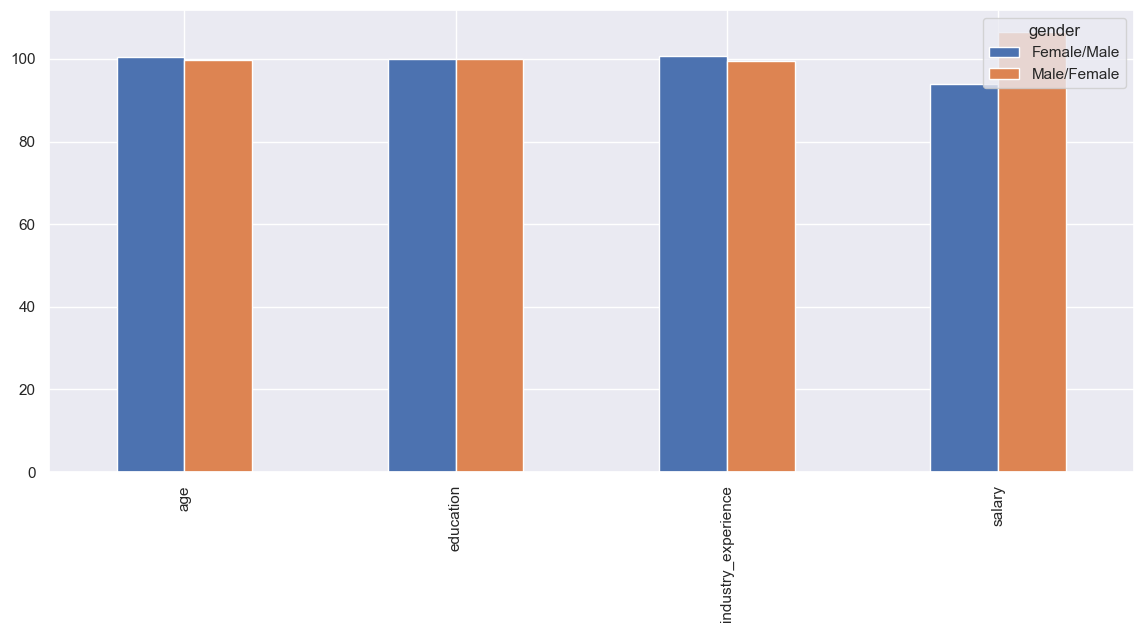

In [37]:
df_gender_diff_pivot.plot(kind='bar', figsize=(14, 6))

In [38]:
percent_diff_num = {'age': df_m.age.mean() / df_f.age.mean() * 100 - 100,
        'education': df_m.education.mean() / df_f.education.mean() * 100 - 100,
        'industry_experience': df_m.industry_experience.mean() / df_f.industry_experience.mean() * 100 - 100,
        'salary': df_m.salary.mean() / df_f.salary.mean() * 100 - 100,
        'gender': 'Male/Female'
       }

In [39]:
percent_diff_num

{'age': -0.3471486501579193,
 'education': -0.04437234658608702,
 'industry_experience': -0.6217853833600486,
 'salary': 6.534410748105543,
 'gender': 'Male/Female'}

In [40]:
pdm = pd.DataFrame(percent_diff_num, index=[0])

<AxesSubplot:>

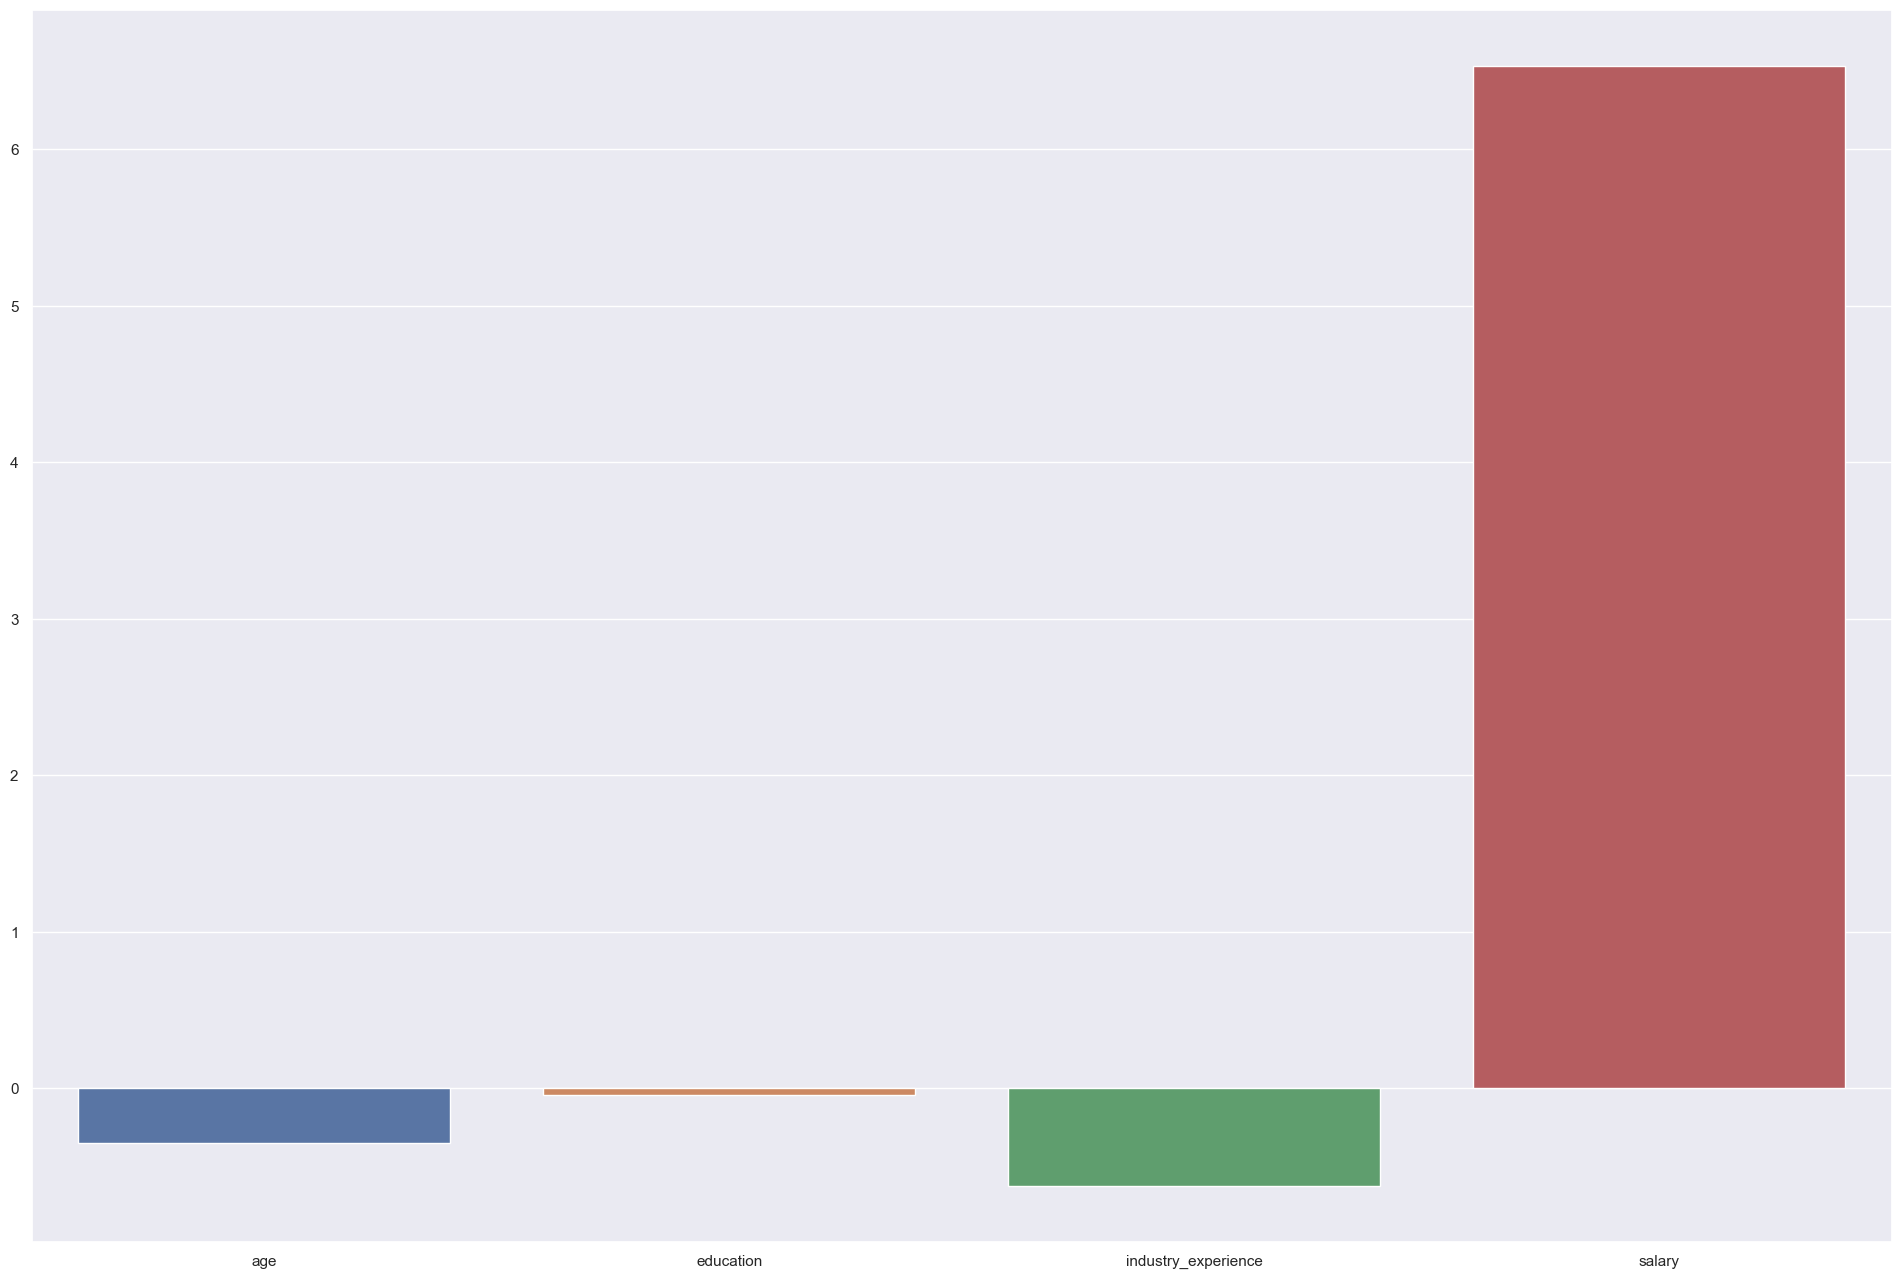

In [41]:
sns.barplot(pdm)